<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
raw_pd = ''
sat_scores_file = 'sat_scores.csv'
with open(sat_scores_file, 'r') as f:
    raw_pd = f.read()
raw_pd

'State,Rate,Verbal,Math\nCT,82,509,510\nNJ,81,499,513\nMA,79,511,515\nNY,77,495,505\nNH,72,520,516\nRI,71,501,499\nPA,71,500,499\nVT,69,511,506\nME,69,506,500\nVA,68,510,501\nDE,67,501,499\nMD,65,508,510\nNC,65,493,499\nGA,63,491,489\nIN,60,499,501\nSC,57,486,488\nDC,56,482,474\nOR,55,526,526\nFL,54,498,499\nWA,53,527,527\nTX,53,493,499\nHI,52,485,515\nAK,51,514,510\nCA,51,498,517\nAZ,34,523,525\nNV,33,509,515\nCO,31,539,542\nOH,26,534,439\nMT,23,539,539\nWV,18,527,512\nID,17,543,542\nTN,13,562,553\nNM,13,551,542\nIL,12,576,589\nKY,12,550,550\nWY,11,547,545\nMI,11,561,572\nMN,9,580,589\nKS,9,577,580\nAL,9,559,554\nNE,8,562,568\nOK,8,567,561\nMO,8,577,577\nLA,7,564,562\nWI,6,584,596\nAR,6,562,550\nUT,5,575,570\nIA,5,593,603\nSD,4,577,582\nND,4,592,599\nMS,4,566,551\nAll,45,506,514\n'

In [3]:
#Splitting up the string and seperating into dictionaries
raw_pd_clean=raw_pd.replace('\n',',').split(',')[0:212]
raw_pd_float=[]
for item in raw_pd_clean:
    if item.isdigit()==True:
        raw_pd_float.append(float(item))
    else:
        raw_pd_float.append(item)

sat_scores_list=[raw_pd_float[i:i+4] for i in range(0,len(raw_pd_float),4)]
sat_scores_dict={'column%d' %(i+1):sat_scores_list[i] for i in range(0,len(sat_scores_list))}
sat_scores_dict

{'column1': ['State', 'Rate', 'Verbal', 'Math'],
 'column2': ['CT', 82.0, 509.0, 510.0],
 'column3': ['NJ', 81.0, 499.0, 513.0],
 'column4': ['MA', 79.0, 511.0, 515.0],
 'column5': ['NY', 77.0, 495.0, 505.0],
 'column6': ['NH', 72.0, 520.0, 516.0],
 'column7': ['RI', 71.0, 501.0, 499.0],
 'column8': ['PA', 71.0, 500.0, 499.0],
 'column9': ['VT', 69.0, 511.0, 506.0],
 'column10': ['ME', 69.0, 506.0, 500.0],
 'column11': ['VA', 68.0, 510.0, 501.0],
 'column12': ['DE', 67.0, 501.0, 499.0],
 'column13': ['MD', 65.0, 508.0, 510.0],
 'column14': ['NC', 65.0, 493.0, 499.0],
 'column15': ['GA', 63.0, 491.0, 489.0],
 'column16': ['IN', 60.0, 499.0, 501.0],
 'column17': ['SC', 57.0, 486.0, 488.0],
 'column18': ['DC', 56.0, 482.0, 474.0],
 'column19': ['OR', 55.0, 526.0, 526.0],
 'column20': ['FL', 54.0, 498.0, 499.0],
 'column21': ['WA', 53.0, 527.0, 527.0],
 'column22': ['TX', 53.0, 493.0, 499.0],
 'column23': ['HI', 52.0, 485.0, 515.0],
 'column24': ['AK', 51.0, 514.0, 510.0],
 'column25': ['C

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
states=[sat_scores_dict[i][0] for i in sat_scores_dict]
rate=[sat_scores_dict[i][1] for i in sat_scores_dict]
verbal=[sat_scores_dict[i][2] for i in sat_scores_dict]
math=[sat_scores_dict[i][3] for i in sat_scores_dict]

In [5]:
sat_scores_from_dict=pd.DataFrame({'state':states[1:] ,
                         'rate':rate[1:] ,
                         'verbal':verbal[1:] ,
                         'math':math[1:] 
                        })
print(sat_scores_from_dict.head())
print(sat_scores_from_dict.dtypes)

  state  rate  verbal   math
0    CT  82.0   509.0  510.0
1    NJ  81.0   499.0  513.0
2    MA  79.0   511.0  515.0
3    NY  77.0   495.0  505.0
4    NH  72.0   520.0  516.0
state      object
rate      float64
verbal    float64
math      float64
dtype: object


In [6]:
sat_scores=pd.read_csv('sat_scores.csv')
#The last row is 'all' so needs to be removed from dataset as this will
#affect calculation of descriptive statistics
sat_scores=sat_scores[0:51]
sat_scores.columns=['state','rate','verbal','math']
print(sat_scores.head())
print(sat_scores.dtypes)

  state  rate  verbal  math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
state     object
rate       int64
verbal     int64
math       int64
dtype: object


The chief difference is that the read_csv function imported the numbers as integers, whereas my dictionary is floats as that is what I defined. Ultimately, the difference is in efficiency, as the read_csv function is quicker and easier to use

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_scores.head(10)

,state,rate,verbal,math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


Our data has the average verbal and maths SAT scores for states in the USA. The rate column shows the rate of participation- what proportion of students took the SATs)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
sat_scores['rate'].dtypes

dtype('int64')

In [9]:
data_dictionary={'Column Names':sat_scores_dict['column1'],
                 'Data Types' : ['object','int64','int64','int64'],
                 'Description': ['US State','Rate of Participation','Average Verbal Reasoning Score','Average Math Score'],
                 'Shape': sat_scores.shape}

data_dictionary

{'Column Names': ['State', 'Rate', 'Verbal', 'Math'],
 'Data Types': ['object', 'int64', 'int64', 'int64'],
 'Description': ['US State',
  'Rate of Participation',
  'Average Verbal Reasoning Score',
  'Average Math Score'],
 'Shape': (51, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

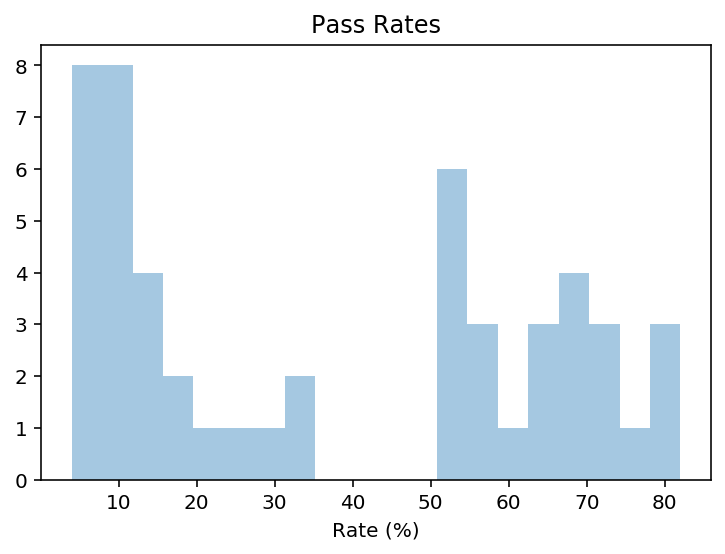

In [10]:
sns.distplot(sat_scores['rate'],bins=20,kde=False,axlabel='Rate (%)').set_title('Pass Rates');

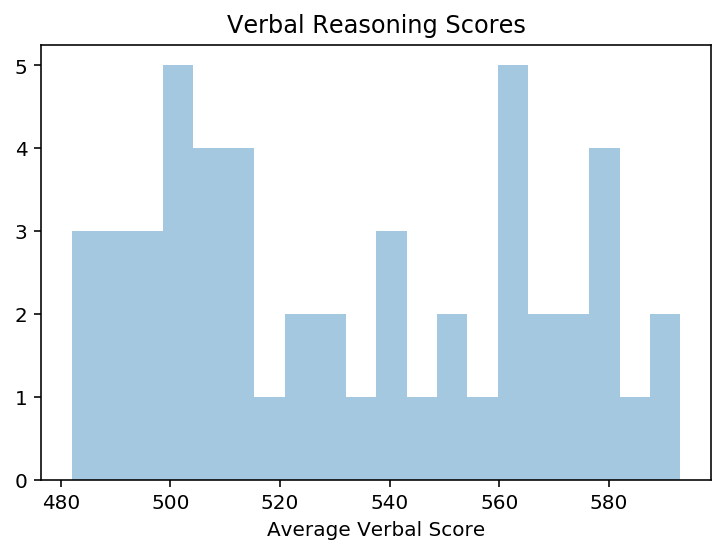

In [11]:
sns.distplot(sat_scores['verbal'],bins=20,kde=False,axlabel='Average Verbal Score').set_title('Verbal Reasoning Scores');

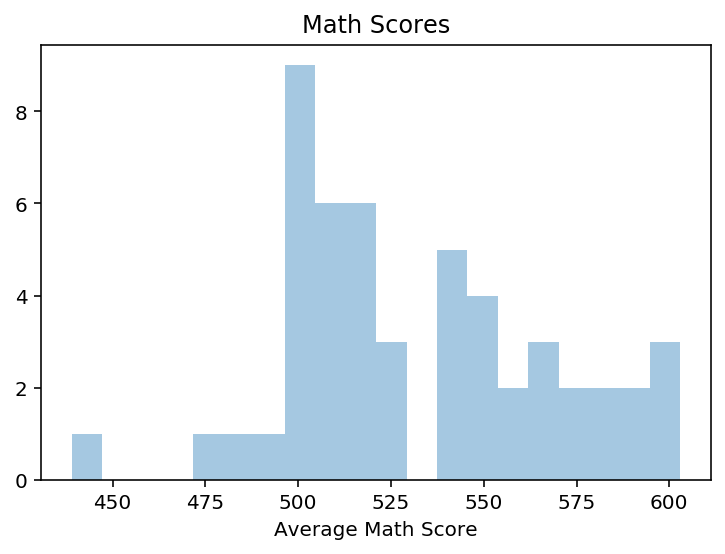

In [12]:
sns.distplot(sat_scores['math'],bins=20,kde=False,axlabel='Average Math Score').set_title('Math Scores');

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

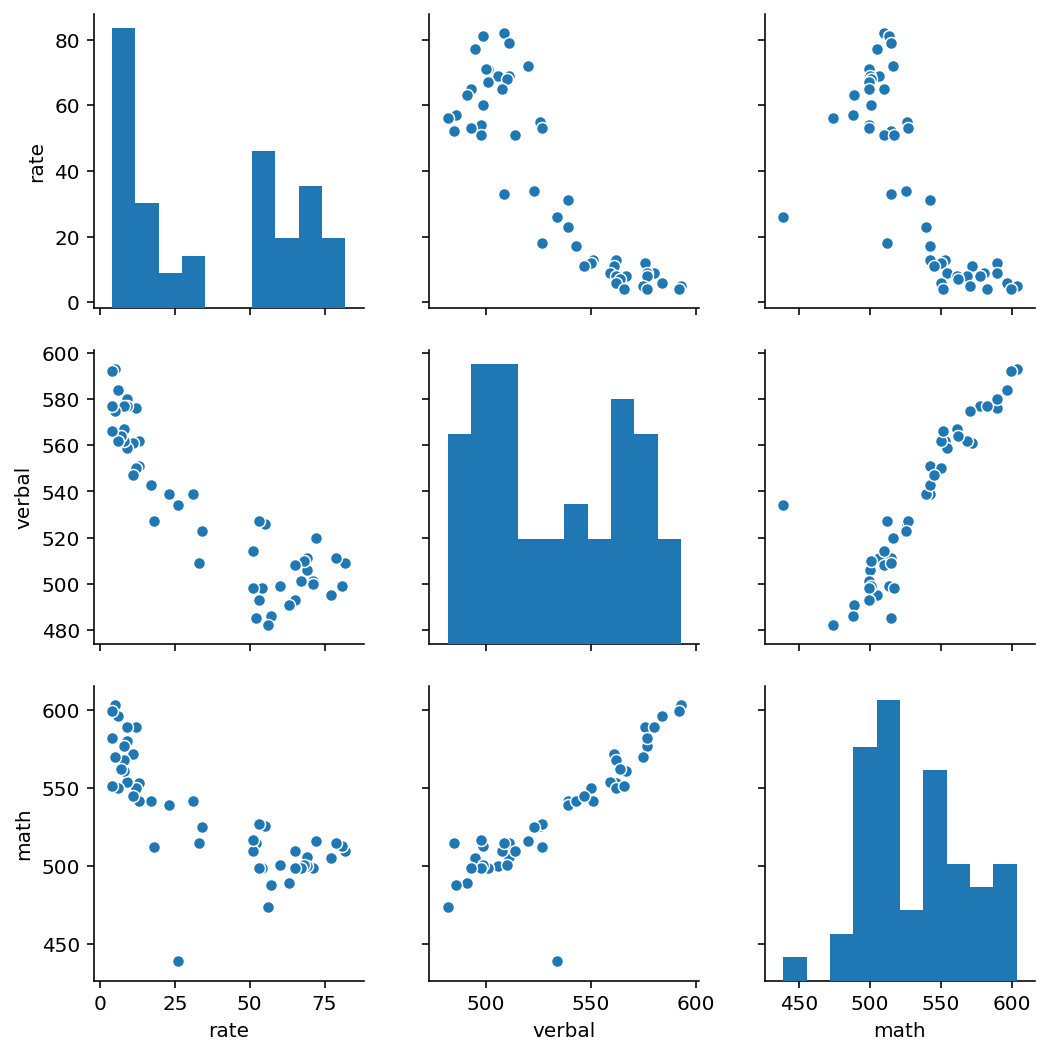

In [13]:
sns.pairplot(sat_scores);

It is clear to see from the visualisation that there is strong positive correlation between verbal scores and reasoning scores. This would warrent further investigation, potentially to see if a predictive model can be made on one of the scores when given the other (would be useful if a student is off ill for one of the tests)

It is also of interest that states with higher rates of participation also have lower verbal and reasoning scores as both comparisons have clear negative correlations. This also would lead to further investigation. For example, are the States with the lower rates of participation only entering more able students? Or what are the demographics like for those states, do they have more trouble getting students into school? 

There is also a clear outlier present within the data, this too should be investigated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

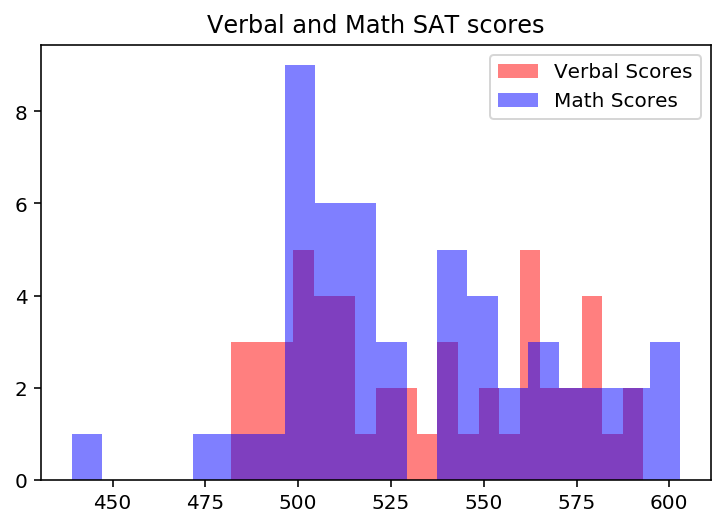

In [14]:
plt.hist(sat_scores['verbal'],bins=20,stacked=True,label='Verbal Scores',fc=(1, 0, 0, 0.5));
plt.hist(sat_scores['math'],bins=20,label='Math Scores',fc=(0, 0, 1, 0.5));
plt.legend();
plt.title('Verbal and Math SAT scores');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

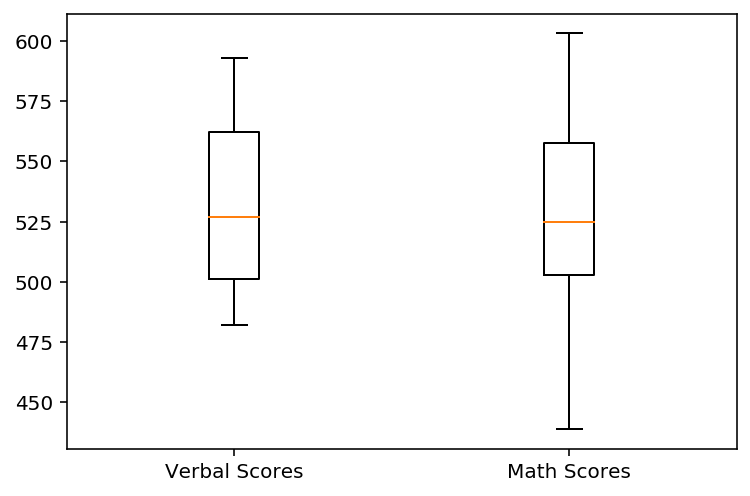

In [15]:
plt.boxplot([sat_scores['verbal'],sat_scores['math']],labels=['Verbal Scores','Math Scores'],showfliers=True,showcaps=True);

    


While you can put rate on the same chart as is, it would be unwise as the range of values is vastly different which would make the chart unreadable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Currently, verbal and math are average values while rate is a percentage. Having done some research, I found that both verbal and math are scored out of 800. To allow comparison between the three I converted both verbal and math into percentages by dividing each by 800

In [16]:
verbal=sat_scores['verbal'].apply(lambda x: round((x/800)*100,0))
math=sat_scores['math'].apply(lambda x: round((x/800)*100,0))
rate=sat_scores['rate']


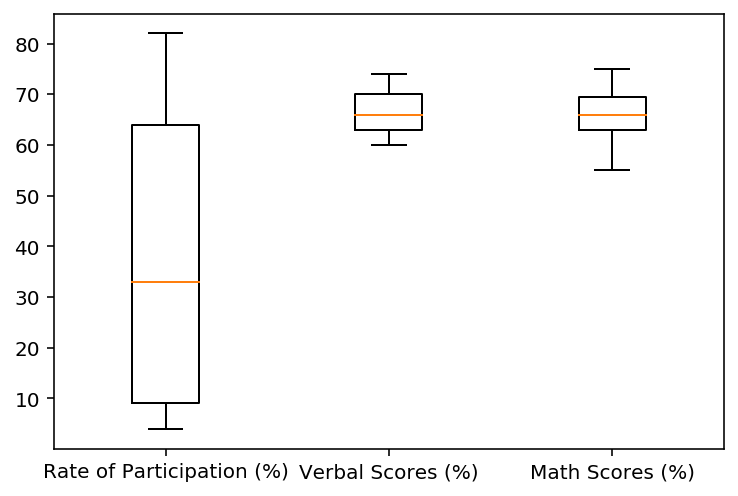

In [17]:
plt.boxplot([rate,verbal,math],labels=['Rate of Participation (%)','Verbal Scores (%)','Math Scores (%)'],showfliers=True);



In [18]:
sat_scores_numeric=sat_scores.loc[:,['rate','verbal','math']]

In [1]:
conda install -c conda-forge scikit-surprise

Solving environment: done

## Package Plan ##

  environment location: /Users/alastairtyson/opt/anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    scikit-surprise-1.1.0      |py37h3b54f70_1001         605 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.6 MB

The following NEW packages will be INSTALLED:

  scikit-surprise    conda-forge/osx-64::scikit-surprise-1.1.0-py37h3b54f70_1001

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates      anaconda::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2019.11.28-hecc5488_0
  certifi                                          anaconda --> conda-forge
  conda             

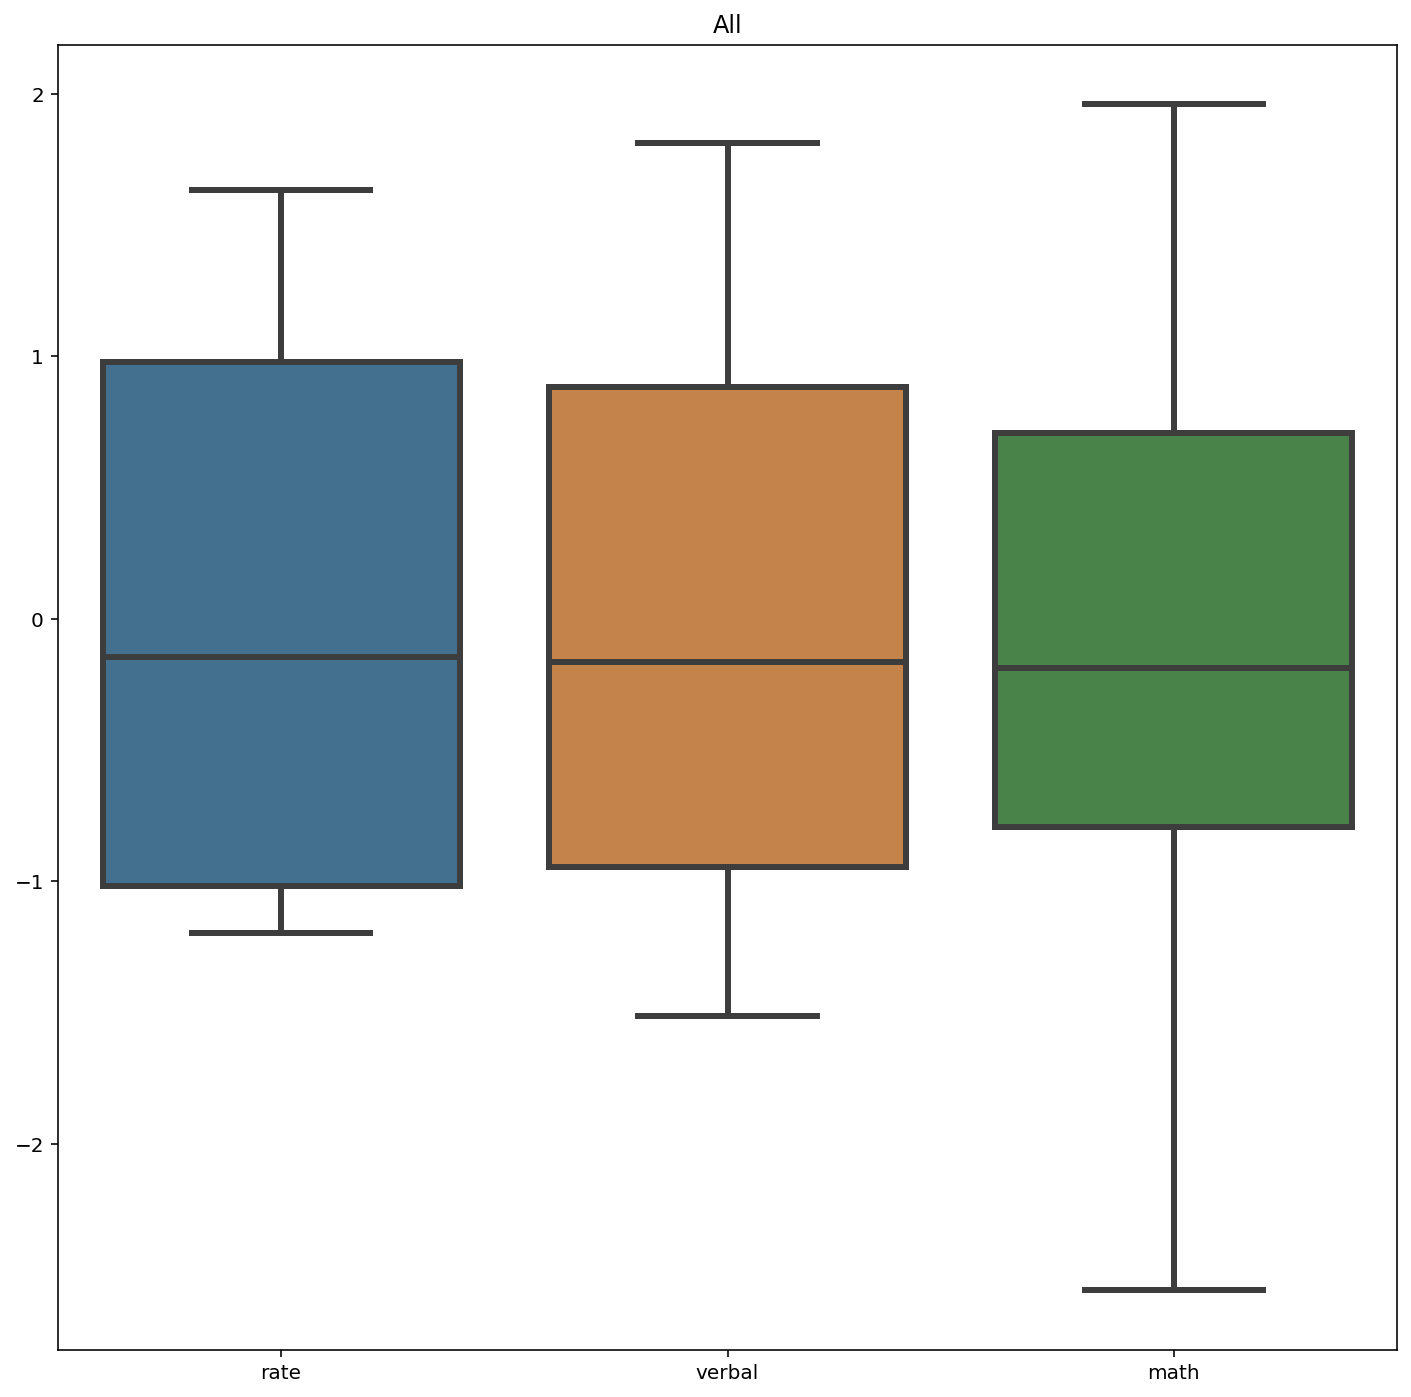

In [19]:
#Checking standardised values for comparison
sat_stand = (sat_scores_numeric - sat_scores_numeric.mean()) / sat_scores_numeric.std()
fig, ax =plt.subplots(figsizae=(12,12))
sns.boxplot(data=sat_stand,orient='v',fliersize=5,linewidth=3,saturation=0.5,ax=ax)
ax.set_title('All');

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
sat_scores[sat_scores['verbal']>sat_scores['math']]['state']

4     NH
5     RI
6     PA
7     VT
8     ME
9     VA
10    DE
13    GA
16    DC
22    AK
27    OH
29    WV
30    ID
31    TN
32    NM
35    WY
39    AL
41    OK
43    LA
45    AR
46    UT
50    MS
Name: state, dtype: object

In [21]:
sat_scores[sat_scores['verbal']>np.mean(sat_scores['verbal'])].shape

(24, 4)

24 states (out of 50) have verbal scores above the mean. This suggests that the verbal scores are distributed symmetrically- as can be seen in the histogram plotted earlier where it had two peaks.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
sat_scores[sat_scores['verbal']>np.median(sat_scores['verbal'])]['state']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: state, dtype: object

31 states are above the median, compared to the 24 above the mean. This would suggest that states with lower verbal scores are more influential than those with greater verbal scores and therefore drag the mean down whereas the median ignores extreme values.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [23]:
sat_scores['verbal_math']=sat_scores.apply(lambda x: x[2]-x[3],axis=1)

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [24]:
sat_scores_verbal_greater=sat_scores.sort_values('verbal_math',ascending=False).reset_index()[0:10]
sat_scores_verbal_greater.head(3)

,index,state,rate,verbal,math,verbal_math
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15


In [25]:
sat_scores_math_greater=sat_scores.sort_values('verbal_math').reset_index()[0:10]
sat_scores_math_greater.head(3)

,index,state,rate,verbal,math,verbal_math
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
sat_scores[['rate','verbal','math']].corr()

,rate,verbal,math
rate,1.000000,-0.888121,-0.773419
verbal,-0.888121,1.000000,0.899909
math,-0.773419,0.899909,1.000000


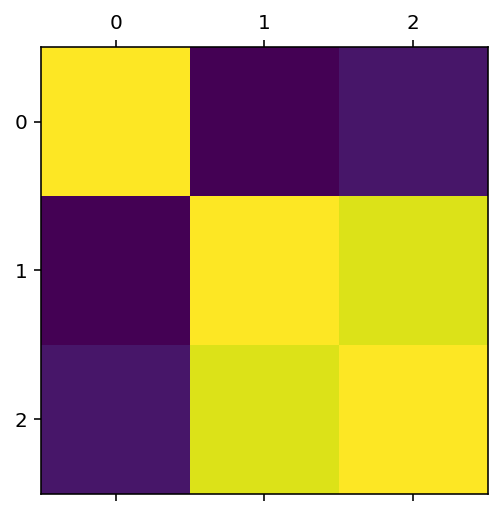

In [27]:
plt.matshow(sat_scores[['rate','verbal','math']].corr());#try seaborn as well

The correlation matrix shows us the correlation between the different variables. Verbal and math clearly have a strong positive correlation between them while both verbal & rate and math & rate return strong negative correlations.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
sat_scores.describe()

,rate,verbal,math,verbal_math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


count: how many pieces of data are in each variable
mean: the mean value for each variable
std: the standard deviation for each variable
min: the smallest value for each variable
25%: the lower quartile (25th percentil) for each variable
50%: the median (50th percentile) for each variable
75%: the upper quartile (75th percentile) for each variable
max: the largest value for each variable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
sat_scores[['rate','verbal','math']].cov()

,rate,verbal,math
rate,759.04,-816.280000,-773.220000
verbal,-816.28,1112.934118,1089.404706
math,-773.22,1089.404706,1316.774902


The covariance matrix shows the covariance between the variables as opposed to the correlation. It is difficult to use covariance for an EDA as depending on the units, different interactions will have different ranges of covariance values making it hard to compare, therefore more difficult to decide which warrant further investigation.

To calculate correlation, divide the covariance by the product of the standard deviations of the two variables you are investigating.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [4]:
drug_use=pd.read_csv('drug-use-by-age.csv')

To make the ages column consistent, I gave each age given in a range the rounded mean value from that range

In [5]:
import numpy as np

In [6]:
#Creating column of age categories with single values
#This is so I can compare ages to different drugs later
age=[]
for ages in drug_use.age:
    if ages.isdigit()==True:
        age.append(int(ages))
    else:
        split=ages.split('-')
        pool=0
        for numbers in split:
            try:
                ints=int(numbers)
                pool+=ints
            except:
                age.append(int(65))
        mean=int(pool/2)
        age.append(mean)
            
age[0:17]

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 27, 32, 42, 57, 65]

In [33]:
drug_use['age']=age[0:17]

In [34]:
print(drug_use.shape)

(17, 28)


In [35]:
drug_use.age.astype(int)

0     12
1     13
2     14
3     15
4     16
5     17
6     18
7     19
8     20
9     21
10    22
11    24
12    27
13    32
14    42
15    57
16    65
Name: age, dtype: int64

In [36]:
drug_use.tail()


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,27,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,32,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,42,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,57,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


No rows have missing values, however in some '0' is represented by a '-' so I have written a for loop that will replace these with a '0'

In [37]:
for column in drug_use.columns:
    drug_use[column.lower()]=drug_use[column].map(lambda x: 0 if x =='-' else float(x))
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null float64
n                          17 non-null float64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyc

drug_use dataframe now has all numerical values with no groups within the data. EDA can now be performed

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [38]:
#drug_use.describe()

In [39]:
#drug_use.corr()

In [40]:
#plt.figure(figsize=(20,20))
#sns.heatmap(drug_use.corr(), annot=True);

In [41]:
#sns.pairplot(drug_use)

In [42]:
#Checking standardised values for comparison
#drug_stand = (drug_use - drug_use.mean()) / drug_use.std()
#fig, ax =plt.subplots(figsize=(60,6))
#sns.boxplot(data=drug_stand,orient='v',fliersize=5,linewidth=3,saturation=0.5,ax=ax)
#ax.set_title('All');

#Plot boxplots comparing uses, then comparing frequencies, then comparing interactions

Initial observation: difficult to read as there are so many variables so I am going to compare uses of each drug against each other, frequencies of each drug against each other and the interaction of uses + frequencies against each other.

In [43]:
#Creating data frames of drug usage only for comparison
uses=[]
for name in drug_use.columns:
    if 'use' in name:
        uses.append(name)


In [44]:
drug_use_use=drug_use.loc[:,uses]
drug_use_use['age']=drug_use['age']

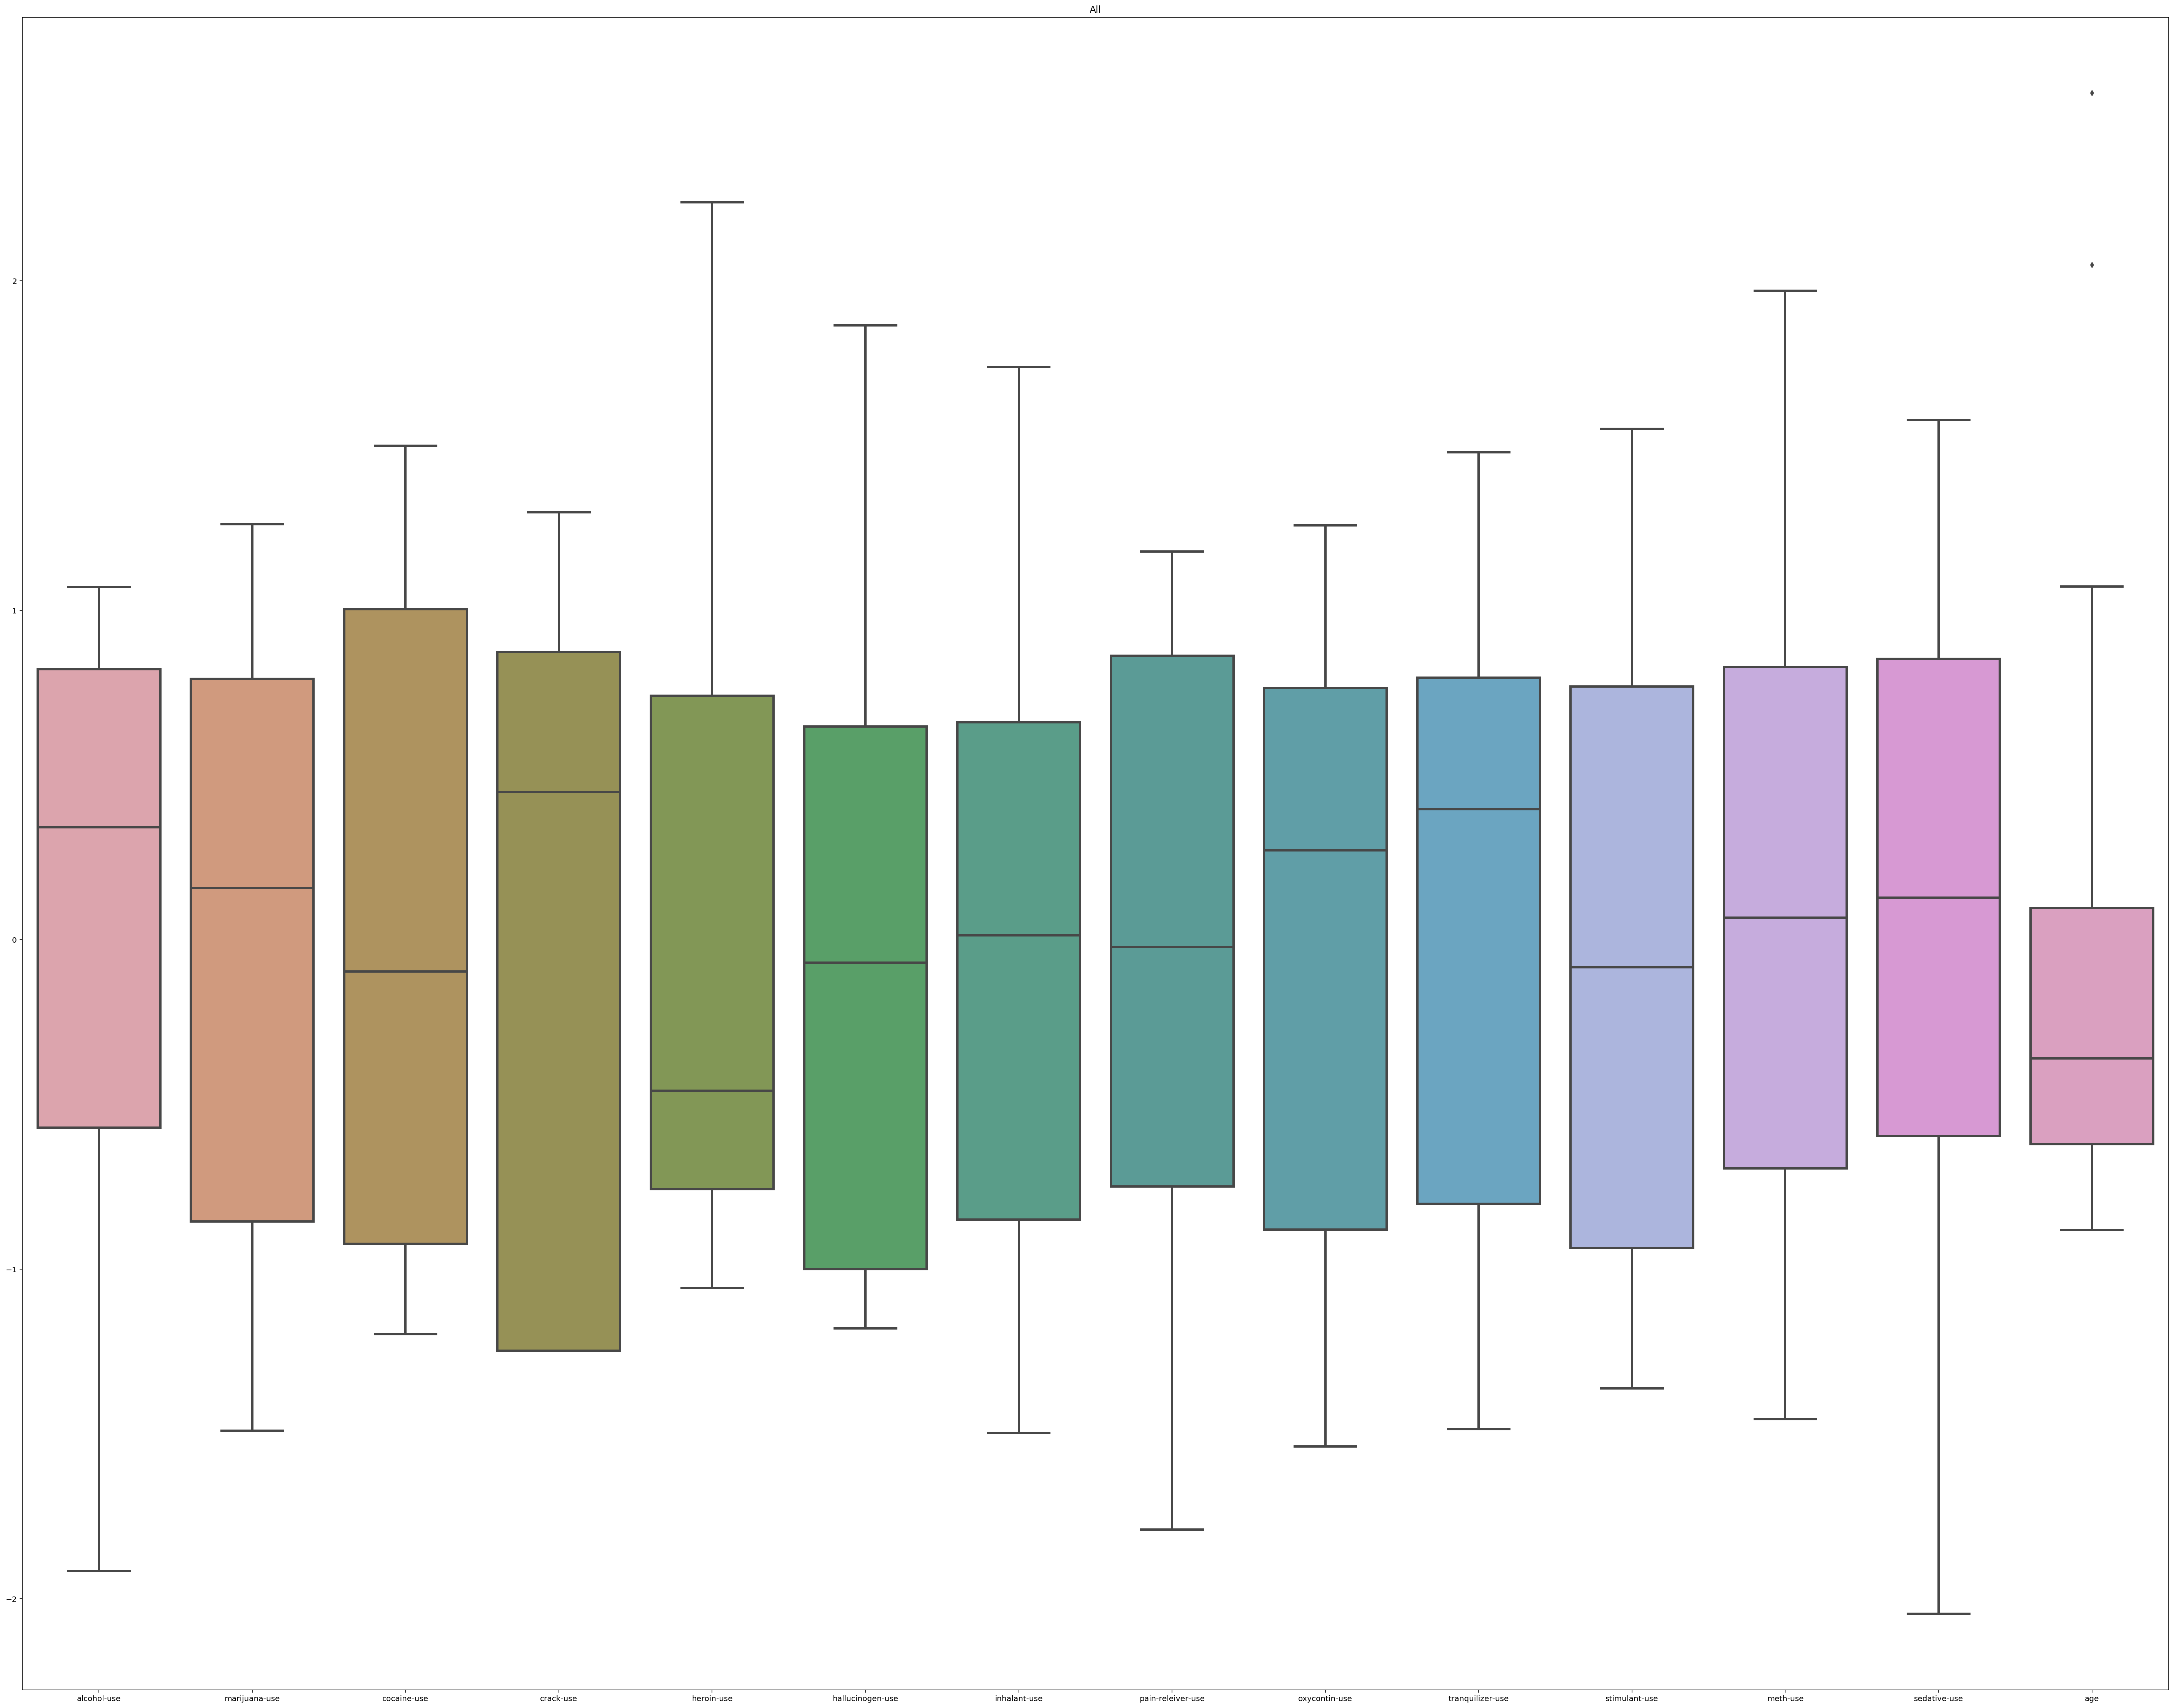

In [45]:
drug_use_stand = (drug_use_use - drug_use_use.mean()) / drug_use_use.std()
fig, ax =plt.subplots(figsize=(50,40))
sns.boxplot(data=drug_use_stand,orient='v',fliersize=5,linewidth=3,saturation=0.5,ax=ax)
ax.set_title('All');

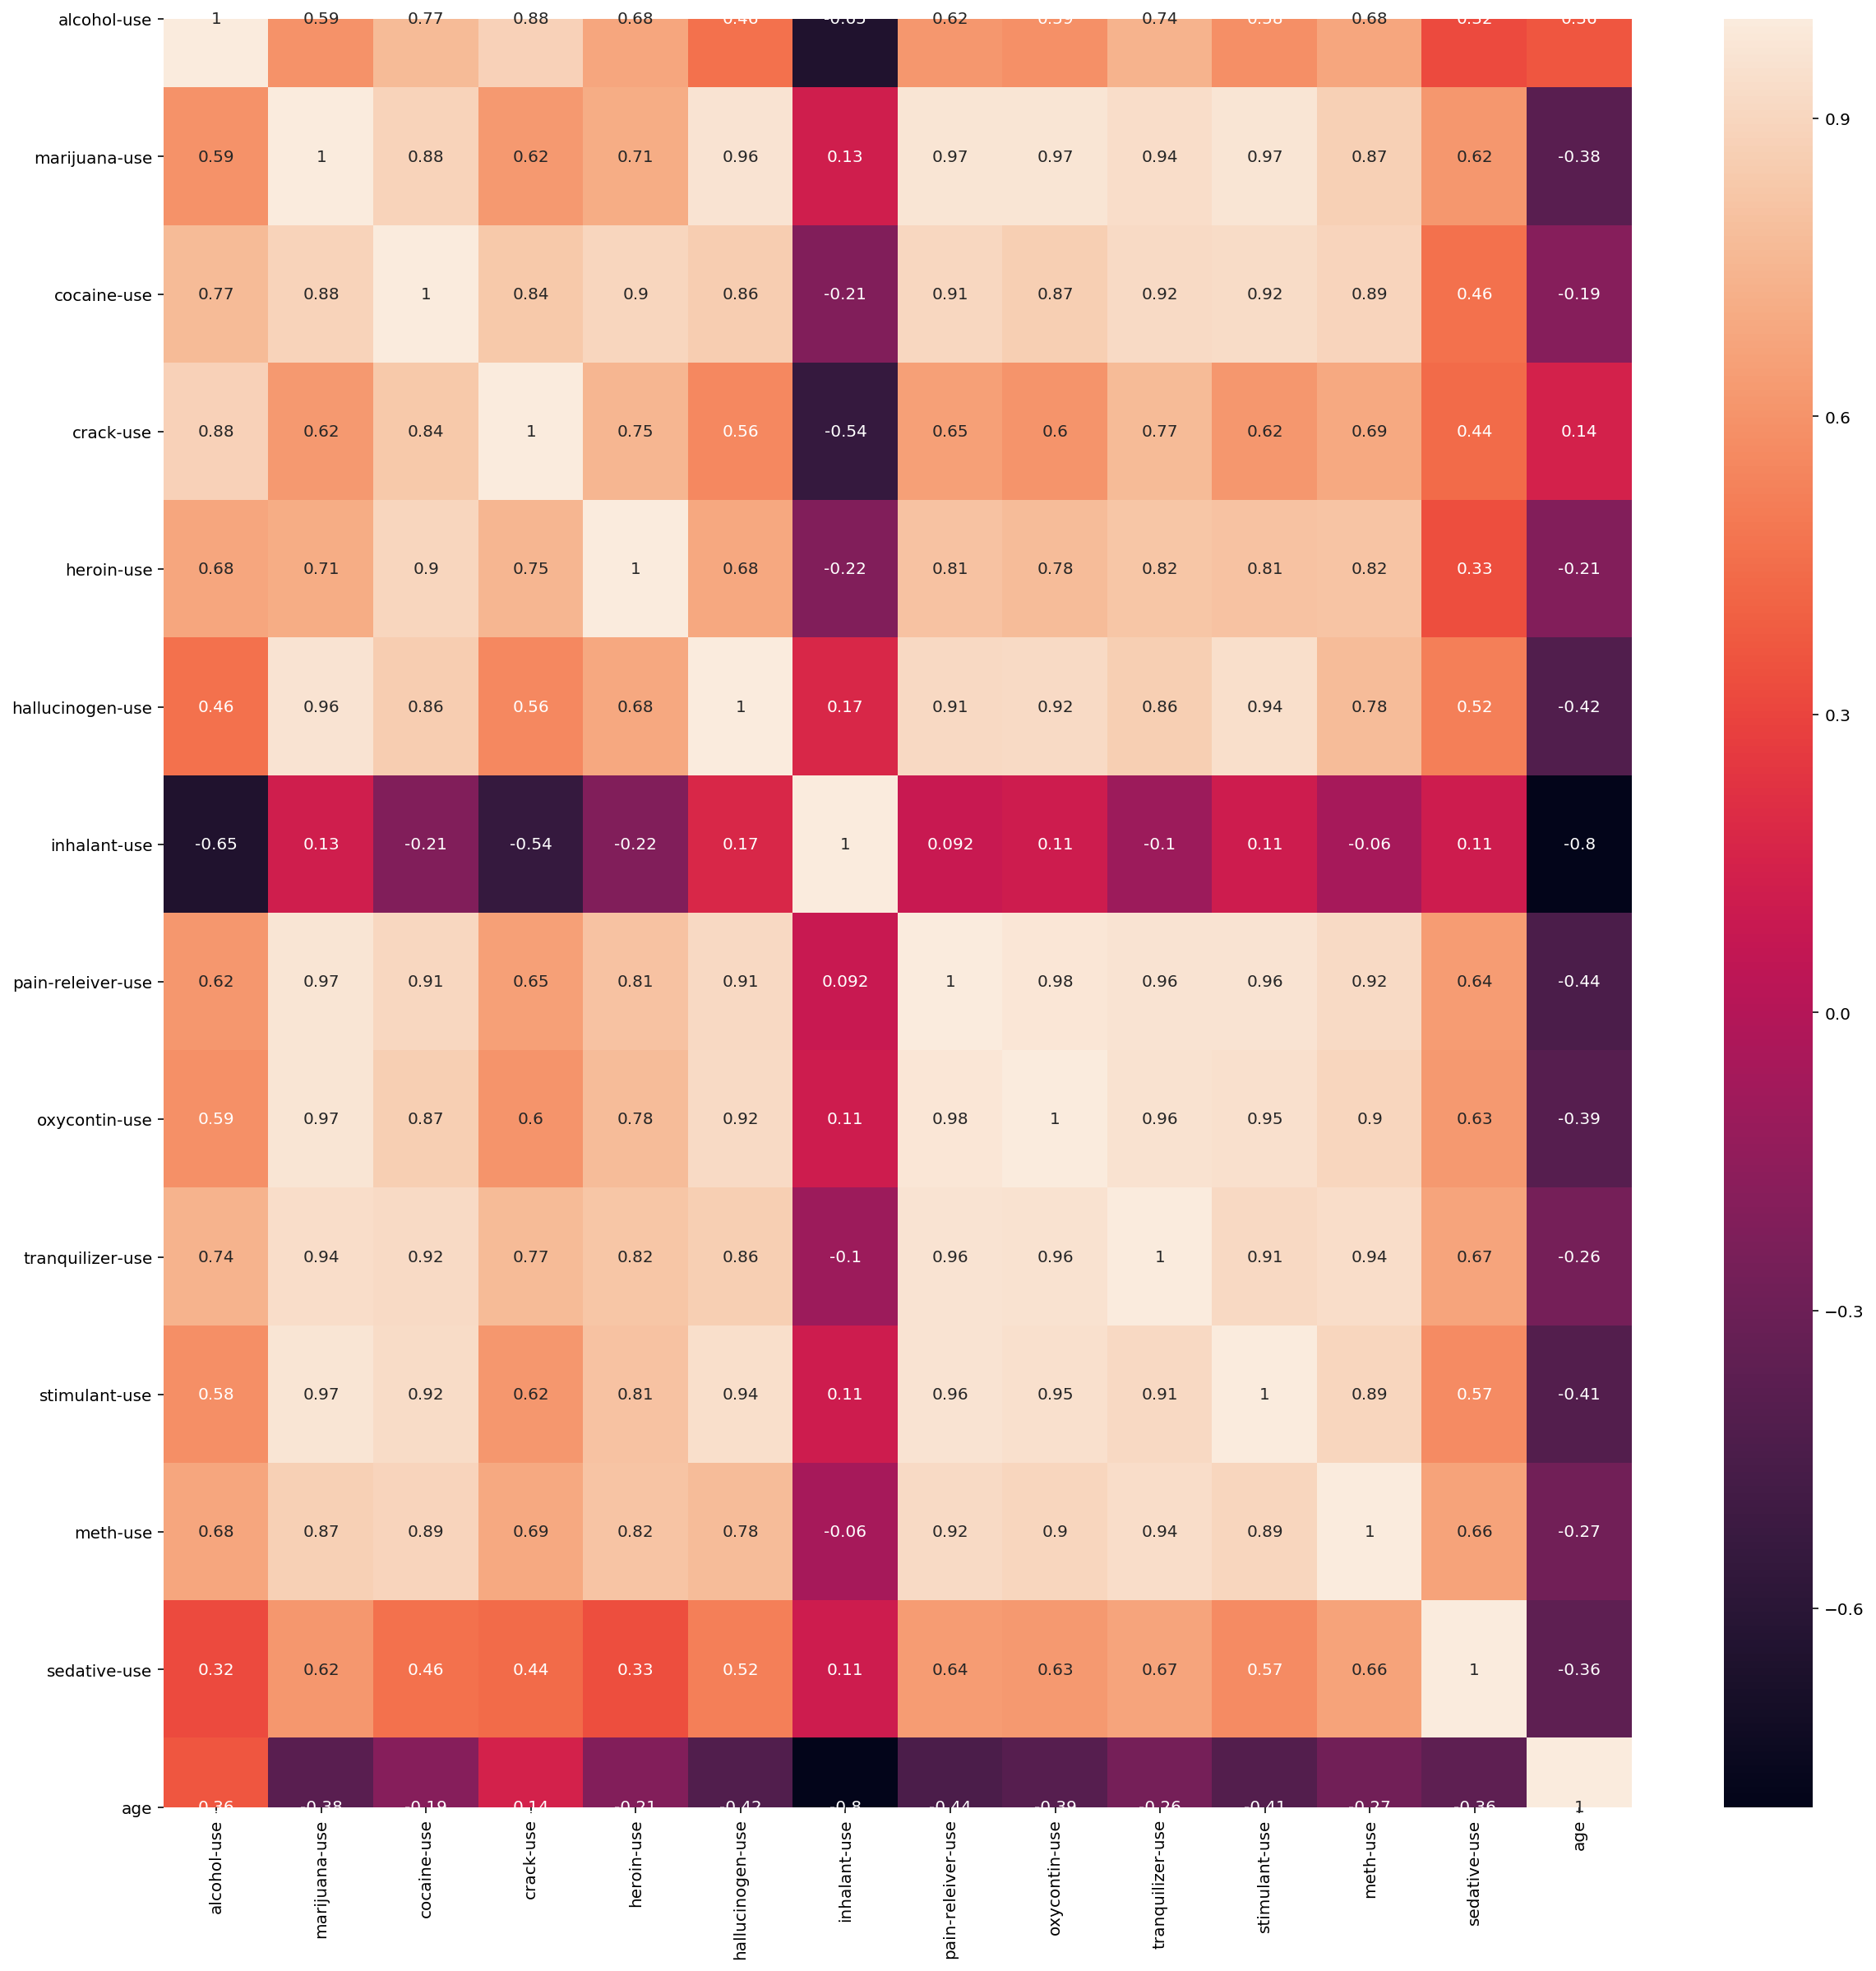

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(drug_use_use.corr(),annot=True);

In [118]:
#dataframe of drug frequencies only
frequency=[]
for name in drug_use.columns:
    if 'frequency' in name:
        frequency.append(name)

drug_use_freq=drug_use.loc[:,frequency]
drug_use_freq['age']=drug_use['age']


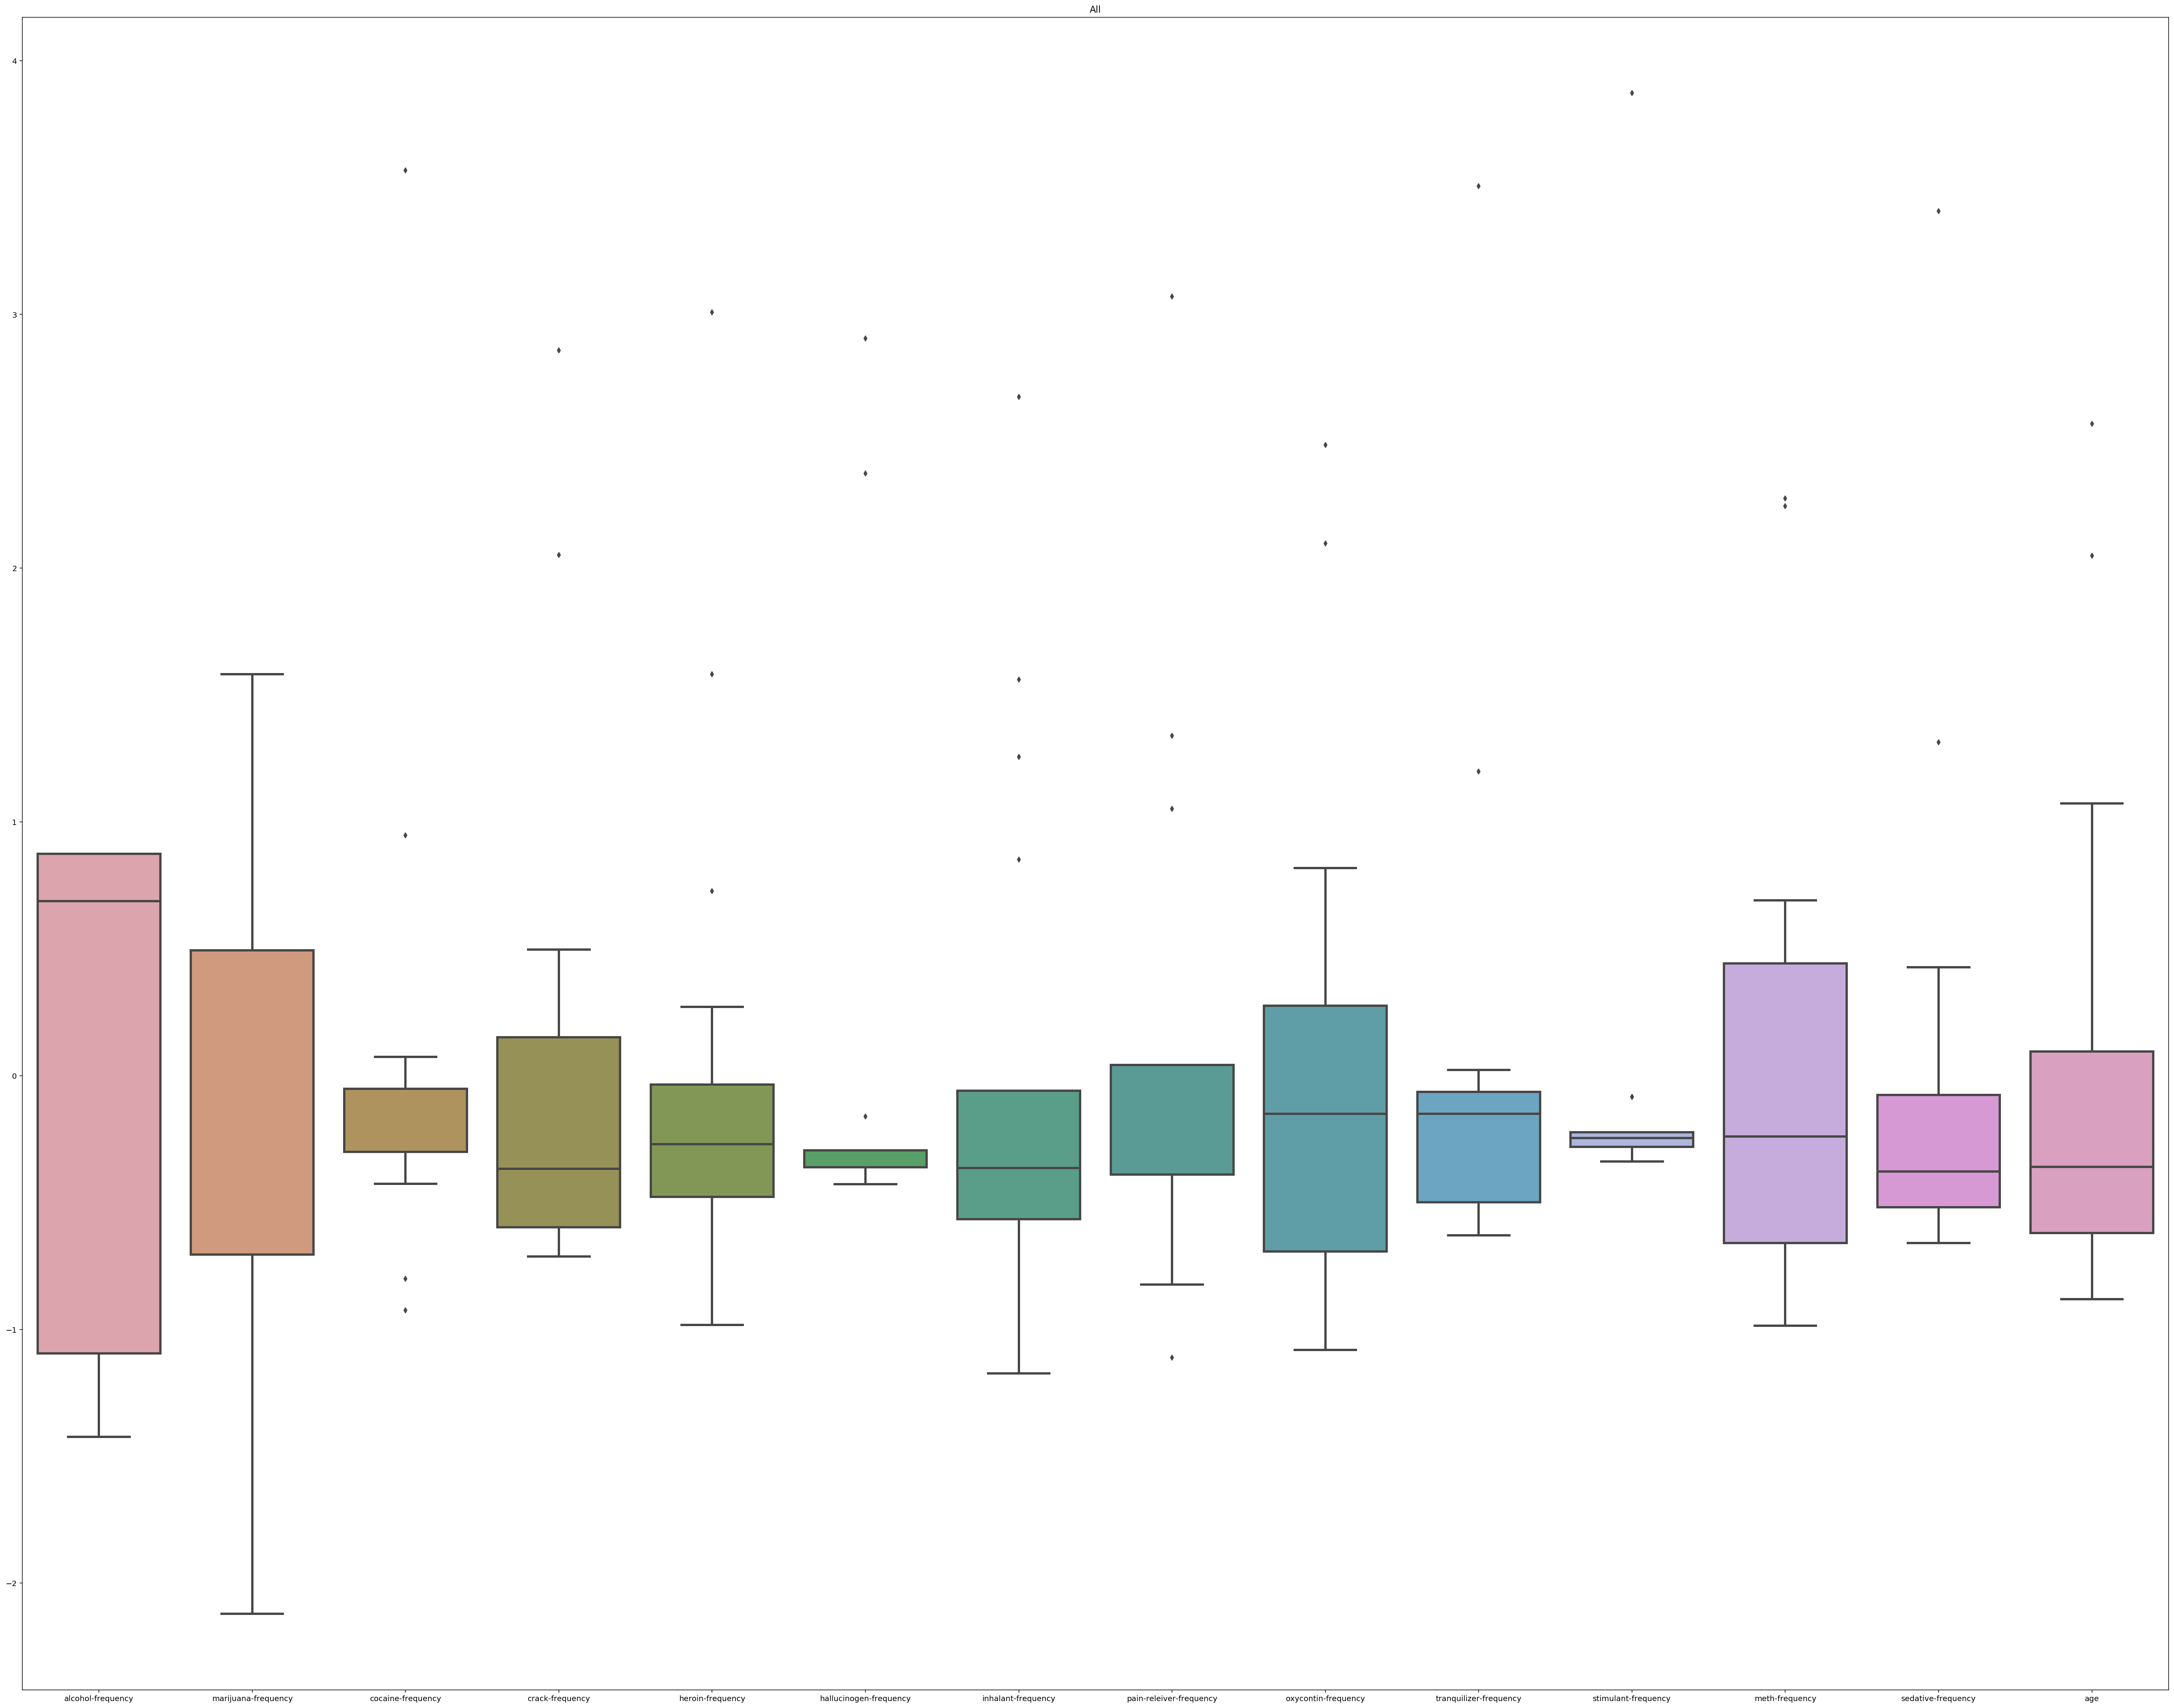

In [119]:
drug_freq_stand = (drug_use_freq - drug_use_freq.mean()) / drug_use_freq.std()
fig, ax =plt.subplots(figsize=(50,40))
sns.boxplot(data=drug_freq_stand,orient='v',fliersize=5,linewidth=3,saturation=0.5,ax=ax)
ax.set_title('All');

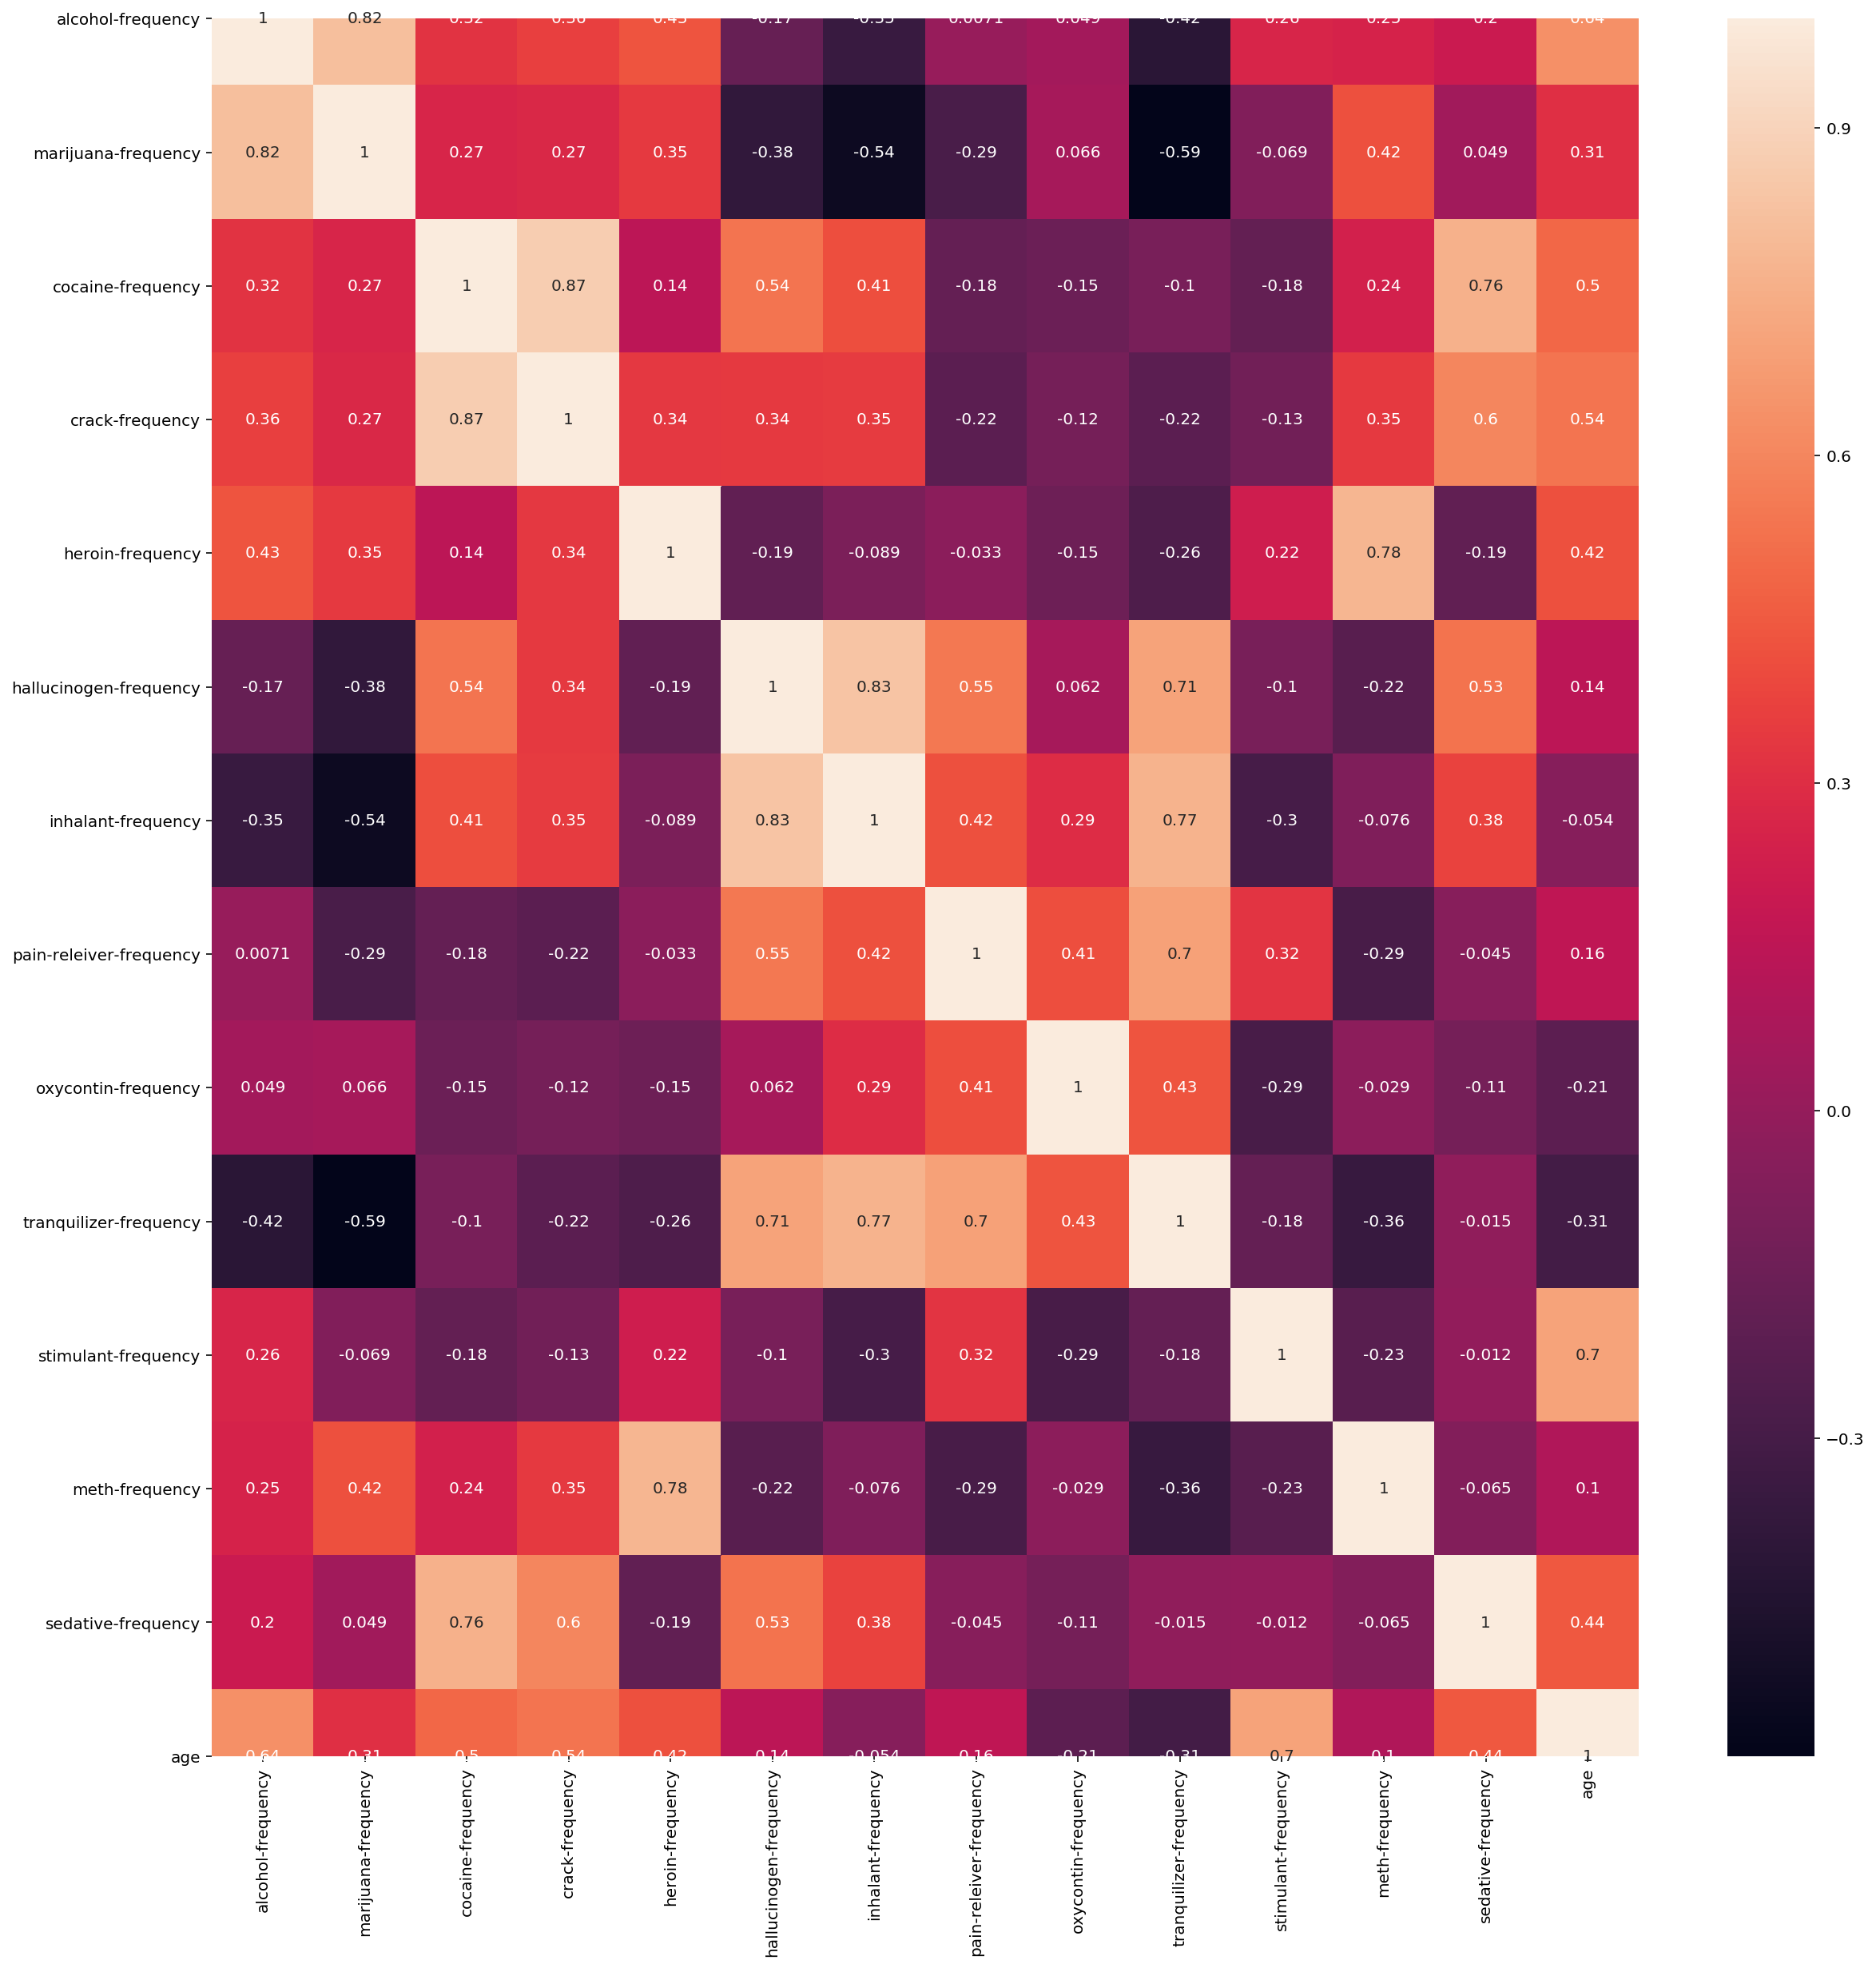

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(drug_use_freq.corr(),annot=True);

In [50]:
drugs=[]
drug_use.columns[2:]
for column in drug_use.columns[2::2]:
    split=column.split('-')
    if len(split)==2:
        drugs.append(split[0])
    elif len(split)==3:
        drugs.append(split[0] + '-' + split[1])


In [51]:
output=[]
for drug in drugs:
    drug_use[drug]=drug_use[drug+'-use']*drug_use[drug+'-frequency']


In [52]:
#dataframe of interaction between each drug use and frequency
drug_use_inter=drug_use.loc[:,drugs]

In [53]:
drug_use_inter['age']=drug_use['age']

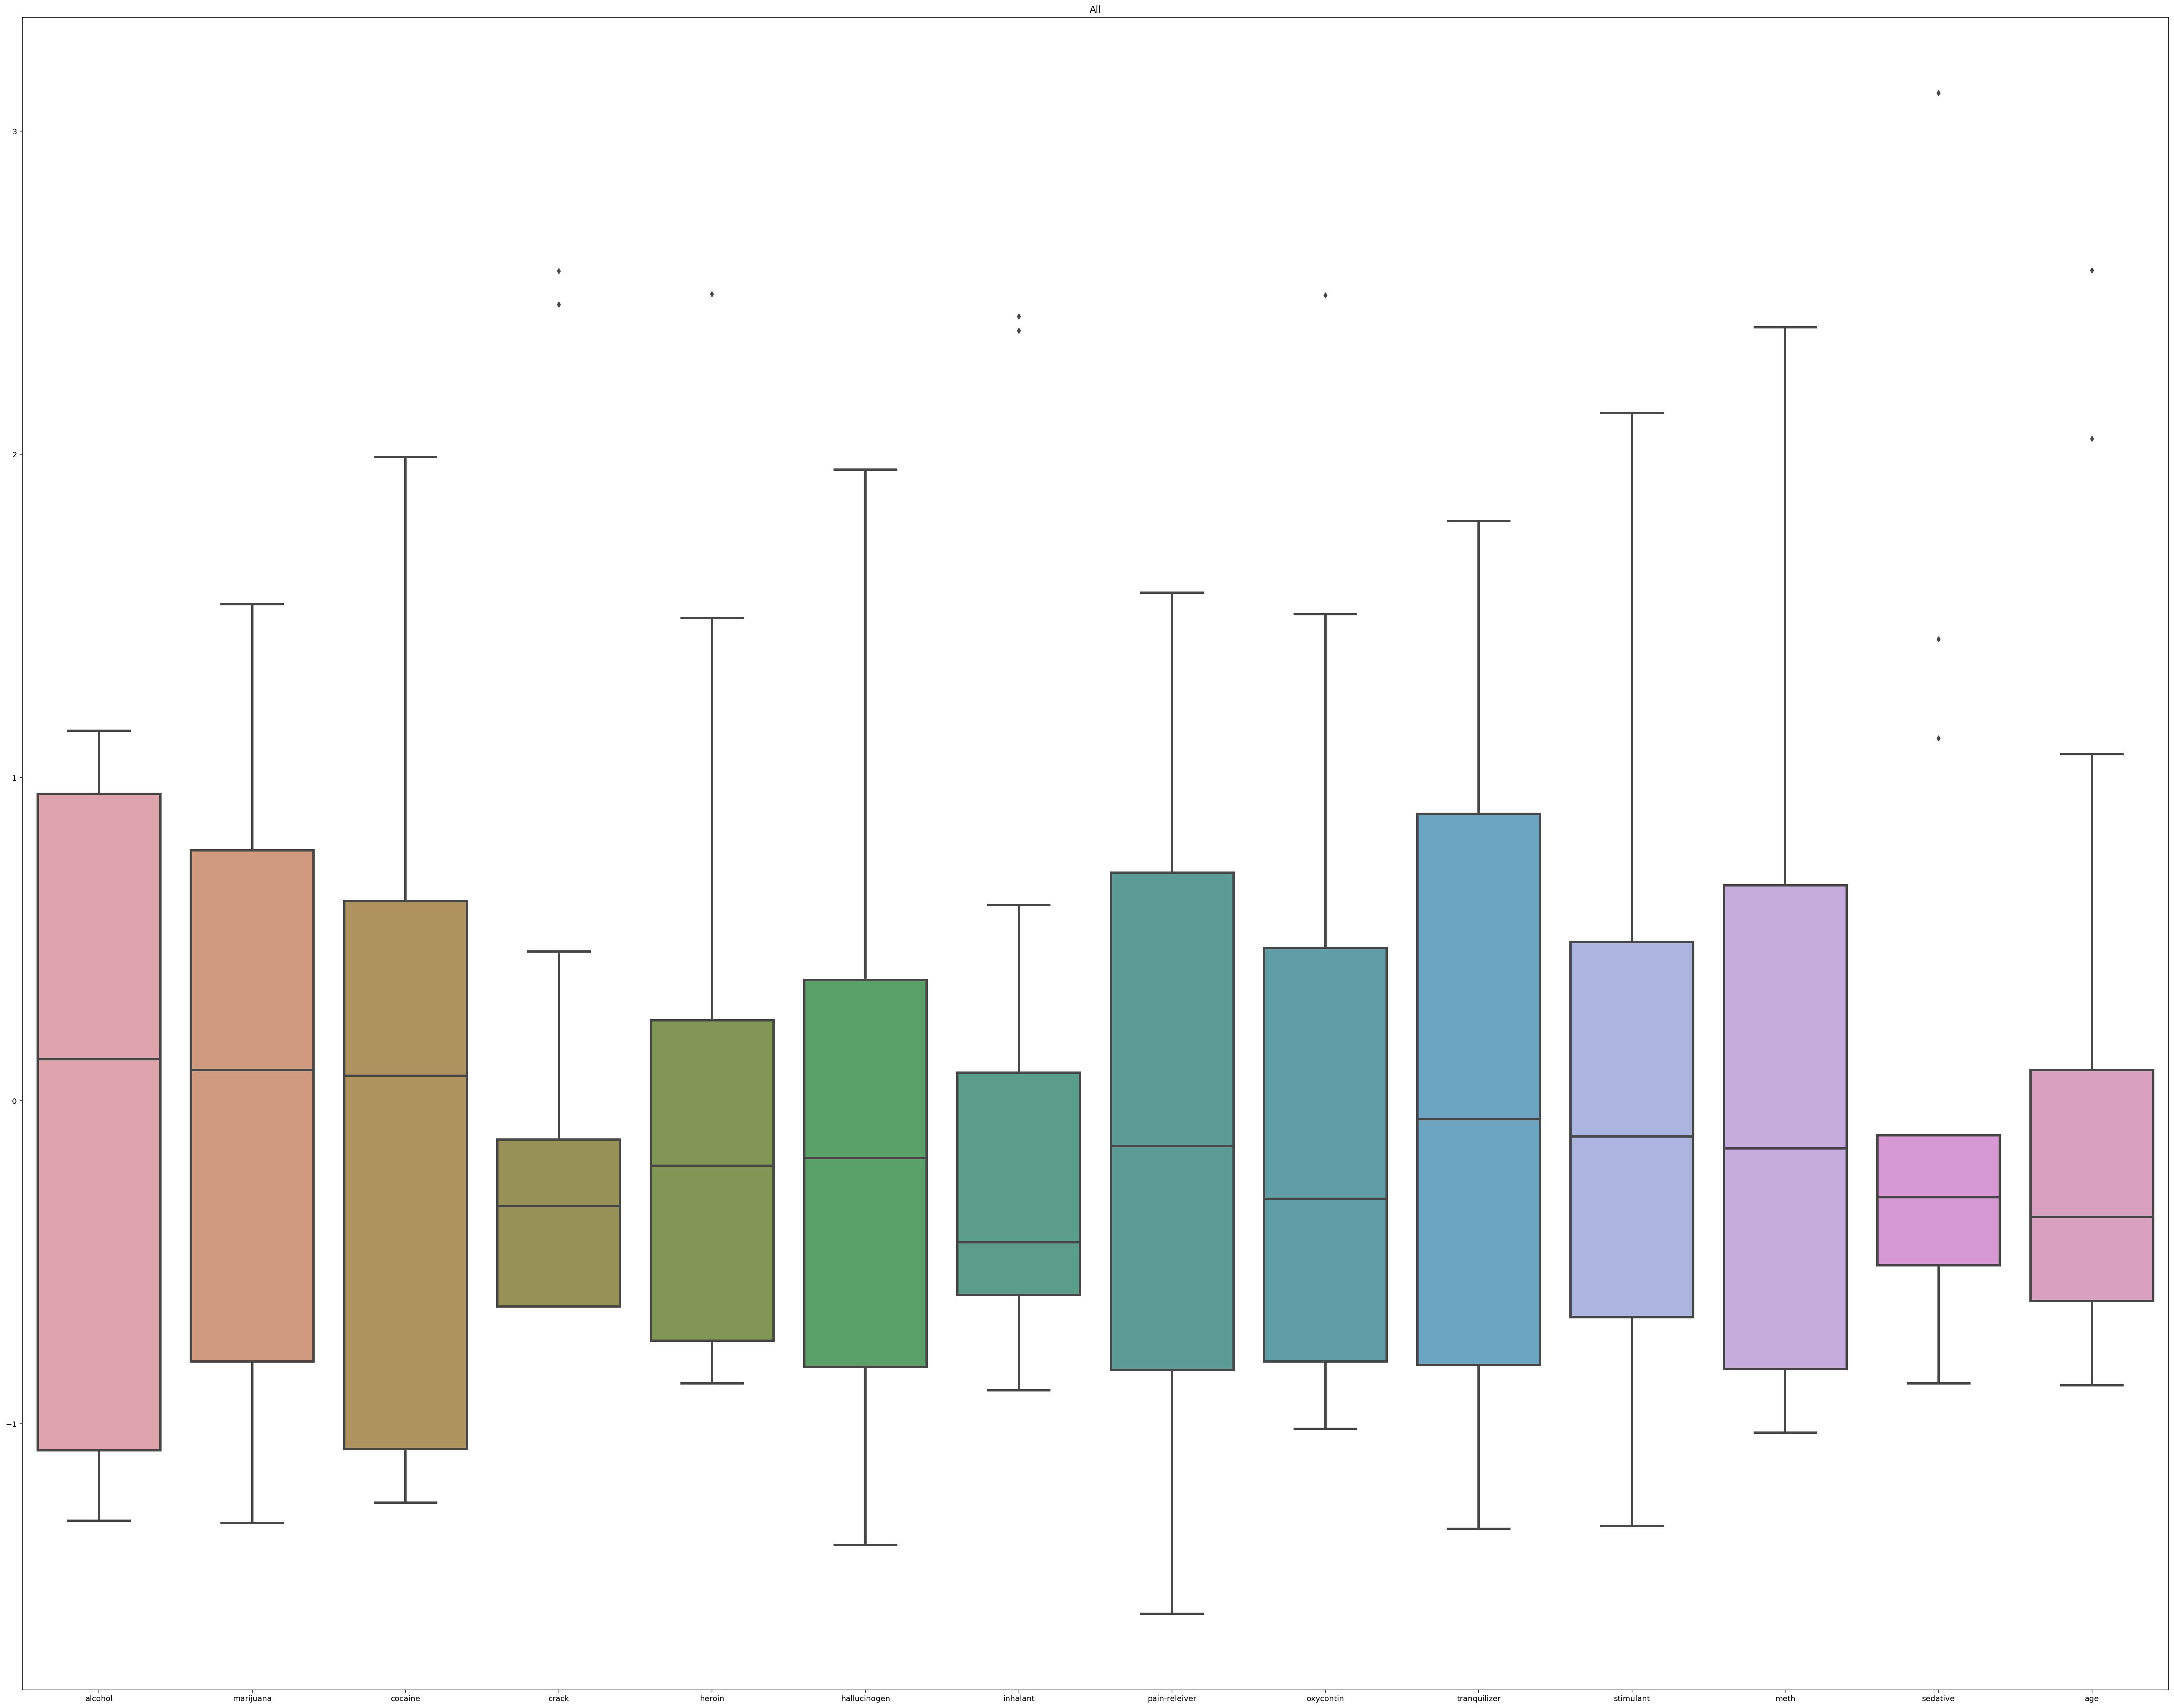

In [54]:
drug_inter_stand = (drug_use_inter - drug_use_inter.mean()) / drug_use_inter.std()
fig, ax =plt.subplots(figsize=(50,40))
sns.boxplot(data=drug_inter_stand,orient='v',fliersize=5,linewidth=3,saturation=0.5,ax=ax)
ax.set_title('All');

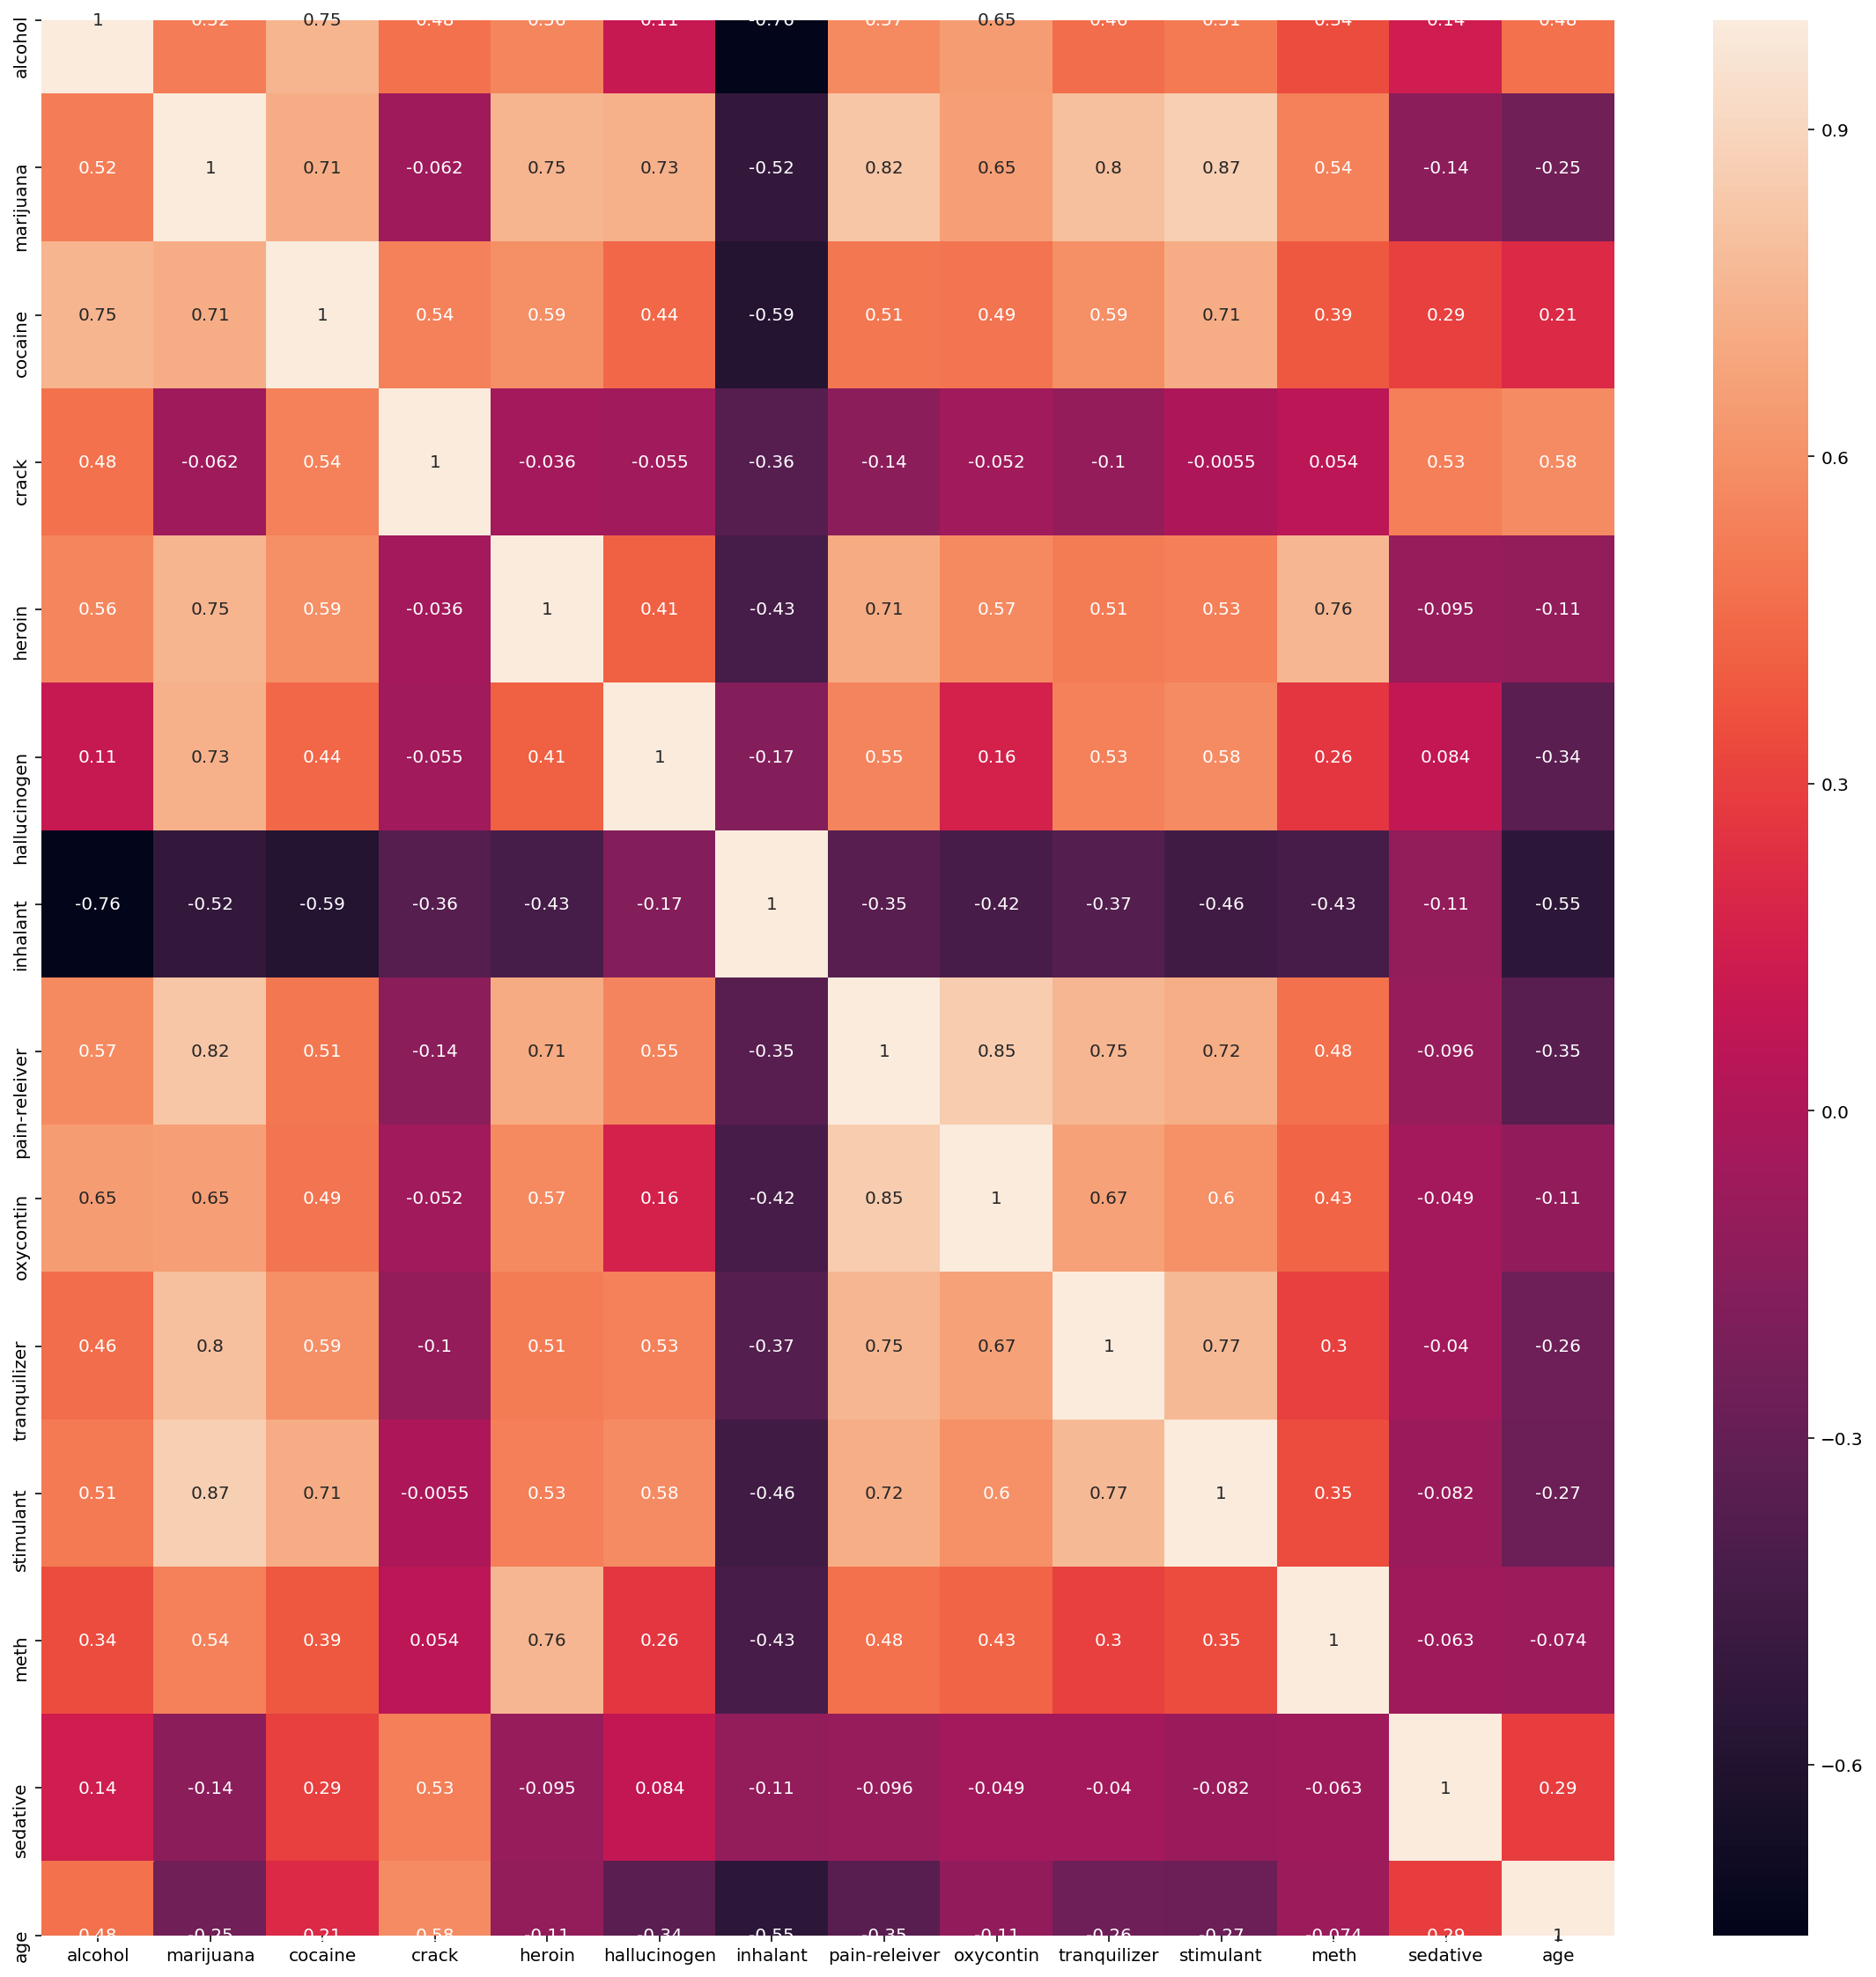

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(drug_use_inter.corr(),annot=True);

In [56]:
#returning original dataframe
drug_use.drop(drugs,axis=1);

Inferences:

I tried a correlation matrix and pairwise comparisons over the whole dataset but found there was too many combinations for the graphs to be readable (code # out above). Instead I split the data into uses, frequencies and the interaction between them for each drug to see what observations would be interesting.

Within the usage of various drugs: there were several drugs which had high levels of correlation with most others: for example, marijuana, hallucegins and heroin. Alcohol showed a high degree of correlation with tranquilisers and cocaine. Interestingly, age is negatively correlated with most drugs although not significantly, with the exception of inhalents. 

Crack and tranquilisers had the highest median usage values while alcohol was negatively skewed the most.

Within frequencies of various drugs: almost opposite to usage, most drugs showed a negative correlation when compared to another- this suggest investigating usage vs frequency as a line of enquiry. In terms of highly positive correlated variables, marijuana and alcohol, crack and cocaine, inhalents and hallucegins and tranquilisers with hallucegins, inhalents and pain relievers. In this case, age was mostly positively correlated with most drugs.

Alcohol has the highest median frequency while alcohol, marijuana, cocaine, hallucegins and pain relievers were the most skewed. 

Within interacitons- out of the three sub investigations, the interactions threw up the most correlated variables. Marijuana was seen to be highly correlated with many others. Pain relief also had many high positive correlations. Inhalents has a high negative correlation with alcohol while age does not have many strong correlaitons at all.

Alcohol and marijuana have the highest medians.

Overall: marijuana has high level of correlation with many other drugs and would warrent further investigation. While age is not correlated with many individual drugs, it would be of interest to see how the different age groups use each drug. Finally, it would be interesting to compare drug usage and drug frequency to see if more people are using a drug, are they using it more often?


Analysis: Which variables appear to be correlated? Which have significant outliers? Which appear to have highest means?

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Hypthesis 1: There is no difference in mean drug uses for under 20 year olds:

To test this I will collect all rows where ages correspond to less than 20 and calculate the mean frequency usage of each drug. If my hypothesis is correct, then all means should be reasonably the same. To confirm I will also return standardised z scores to take into account potential data recording techniques. 
        
        

In [57]:
sub_20=drug_use_freq[drug_use_freq['age']<20].mean()
sub_20

alcohol-frequency          12.8750
marijuana-frequency        30.7500
cocaine-frequency           4.7500
crack-frequency             5.8125
heroin-frequency           49.3750
hallucinogen-frequency      9.7500
inhalant-frequency          6.9375
pain-releiver-frequency    14.0000
oxycontin-frequency        12.1875
tranquilizer-frequency     15.1875
stimulant-frequency         7.0625
meth-frequency             30.0625
sedative-frequency         13.0000
age                        15.5000
dtype: float64

In [58]:
age_stand = (sub_20 - sub_20.mean()) / sub_20.std()
age_stand

alcohol-frequency         -0.270791
marijuana-frequency        1.171029
cocaine-frequency         -0.926164
crack-frequency           -0.840462
heroin-frequency           2.673345
hallucinogen-frequency    -0.522858
inhalant-frequency        -0.749718
pain-releiver-frequency   -0.180047
oxycontin-frequency       -0.326246
tranquilizer-frequency    -0.084262
stimulant-frequency       -0.739635
meth-frequency             1.115574
sedative-frequency        -0.260709
age                       -0.059056
dtype: float64

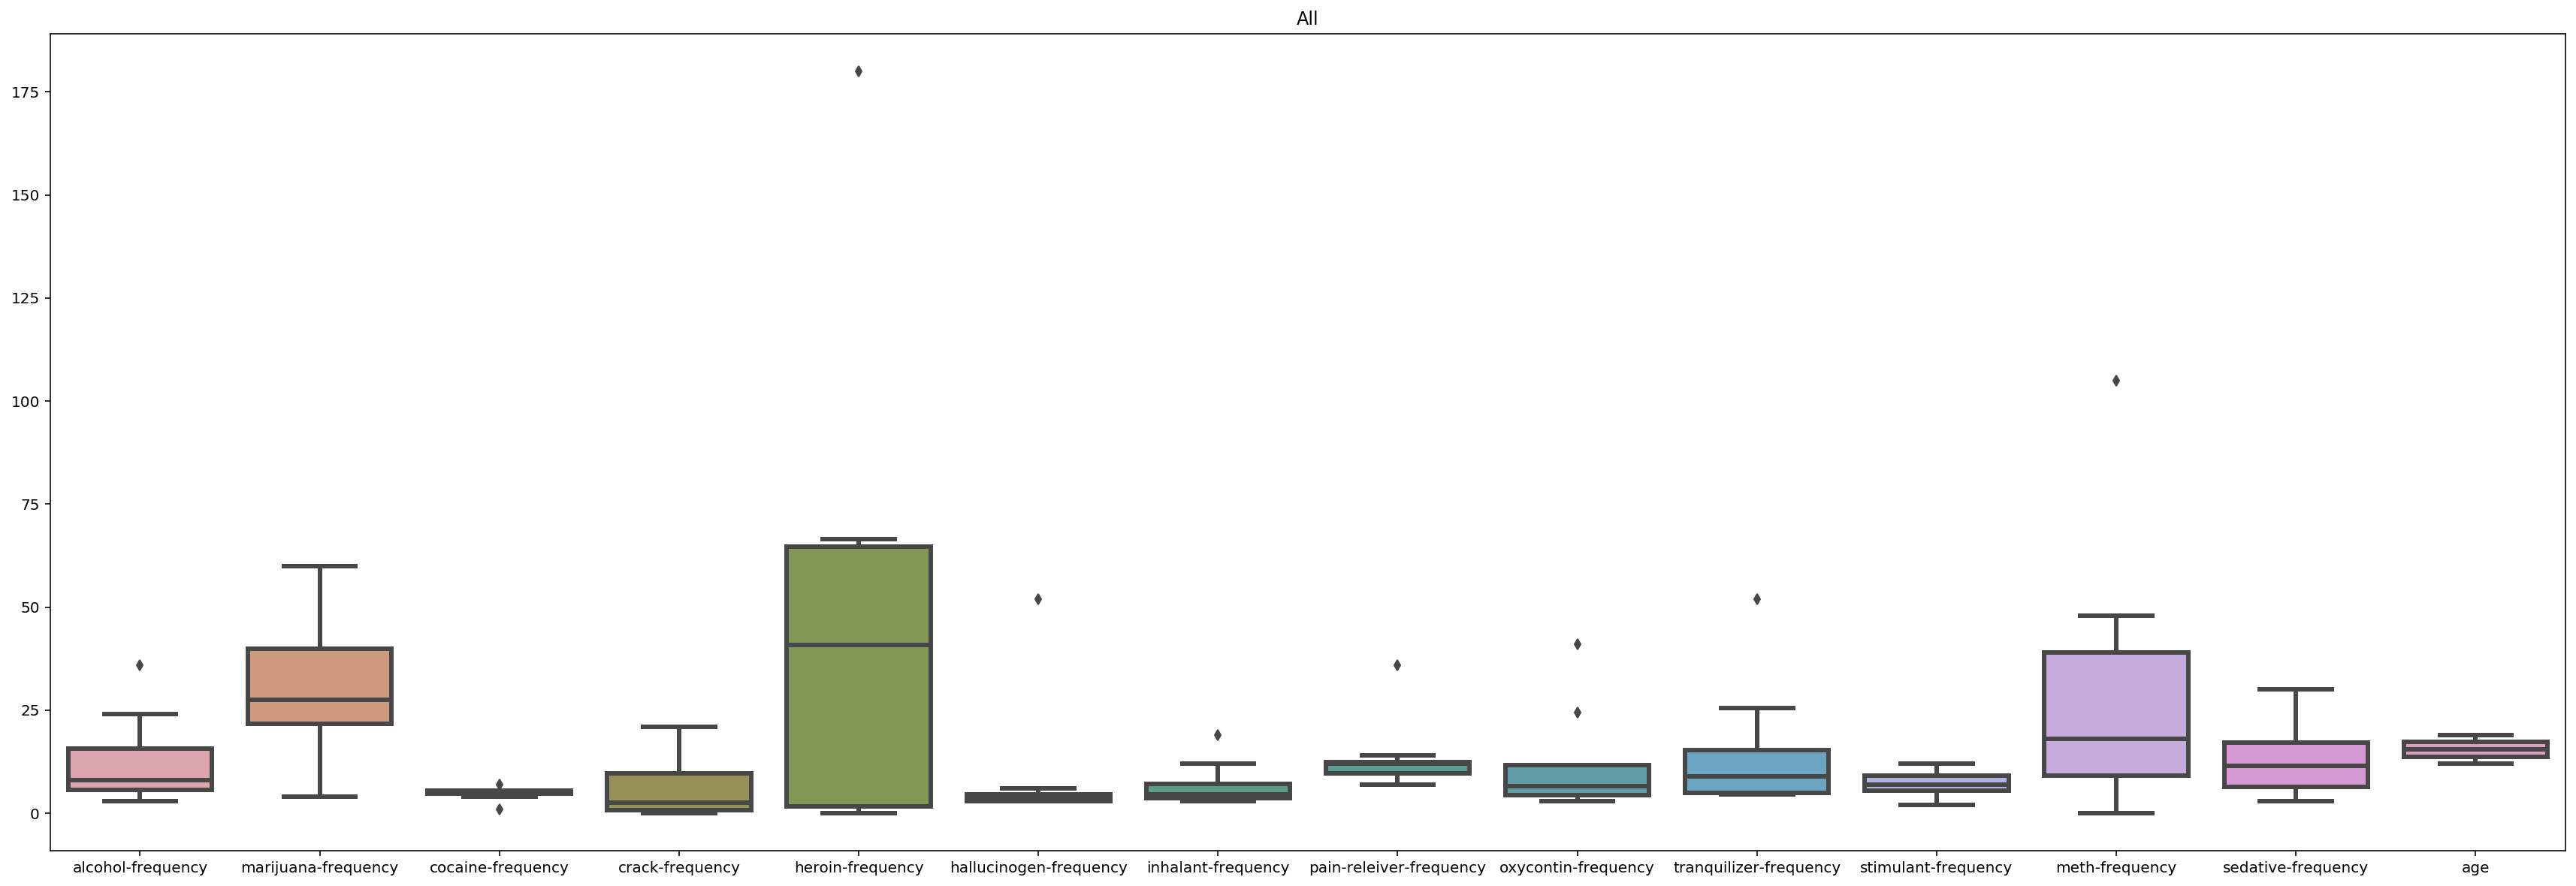

In [59]:
#Boxplots for frequency of each drug
fig, ax =plt.subplots(figsize=(30,10))
sns.boxplot(data=drug_use_freq[drug_use_freq['age']<20],orient='v',fliersize=5,linewidth=3,saturation=0.5,ax=ax)
ax.set_title('All');

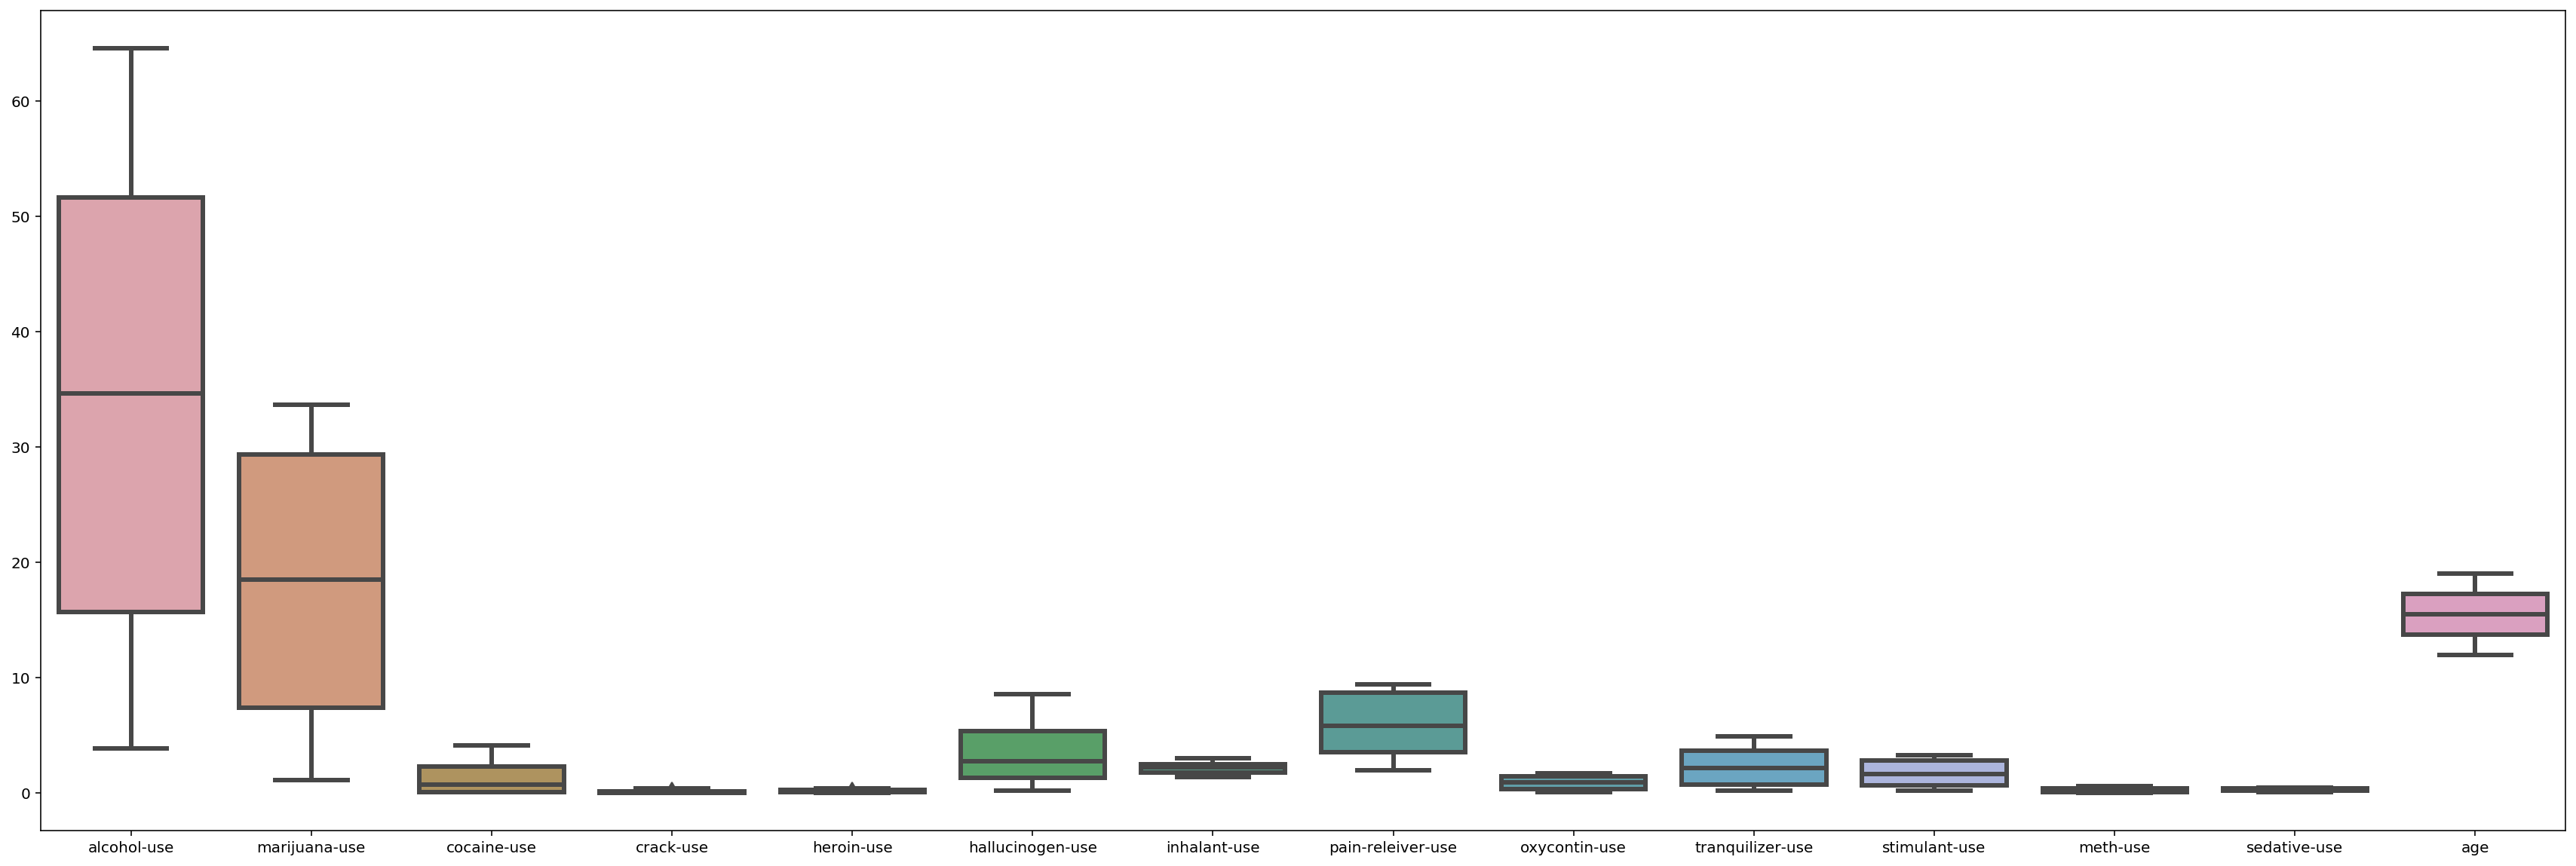

In [60]:
#Boxplots shoing proportion of each drug usage
fig, ax =plt.subplots(figsize=(30,10))
sns.boxplot(data=drug_use_use[drug_use_use['age']<20],orient='v',fliersize=5,linewidth=3,saturation=0.5,ax=ax);

To restate the hypotheses: there is no difference in mean drug usage for under 20 year olds.

After combining all columns in the dataset for under 20's and calculating means it is clear to see that heroin has a higher average mean frequency than other drugs. This shows that out of all drug users, heroin is being taken the most. 

Additionally, marijuana has a significantly higher mean also. Combining this with the fact the marijuana has a higher than average usage amongst under 20 year olds shows that marijuana usage is a significant problem when compared to other drugs.

Therefore, since heroin and marijuana have higher than average drug uses, we can reject our hypothesis that there is no difference in mean.

Hypothesis 2: Younger people are more likely to use drugs than older.

To test this hypothesis I will group the drug usage dataframe I created earlier by age. I will create groups of under 20,20-25, 25-40 and 40+. I will then compare means across these groups and if my hypothesis is correct, the youngest age category will return the highest mean usage across the majority of drugs.

In [61]:
age_group=[]
for age in drug_use.age:
    if age in range(0,20):
        age_group.append('under 20')
    elif age in range(20,25):
        age_group.append('20-25')
    elif age in range(25,40):
        age_group.append('25-40')
    else:
        age_group.append('40+')
drug_use_use['age_group']=age_group
drug_use_use.groupby('age_group').mean()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,age
age_group,,,,,,,,,,,,,,
20-25,80.050000,30.0750,4.5500,0.5250,0.825000,5.850000,1.175000,9.500000,1.500000,4.500000,3.5750,0.700000,0.300000,21.750000
25-40,79.100000,18.6000,2.6500,0.4500,0.500000,2.500000,0.500000,7.100000,1.050000,3.900000,1.8500,0.500000,0.400000,29.500000
40+,63.833333,6.3000,0.8000,0.3000,0.066667,0.333333,0.166667,2.433333,0.233333,1.166667,0.3000,0.133333,0.166667,54.666667
under 20,34.050000,18.1625,1.3875,0.1375,0.187500,3.537500,2.175000,5.887500,0.887500,2.300000,1.7125,0.287500,0.287500,15.500000


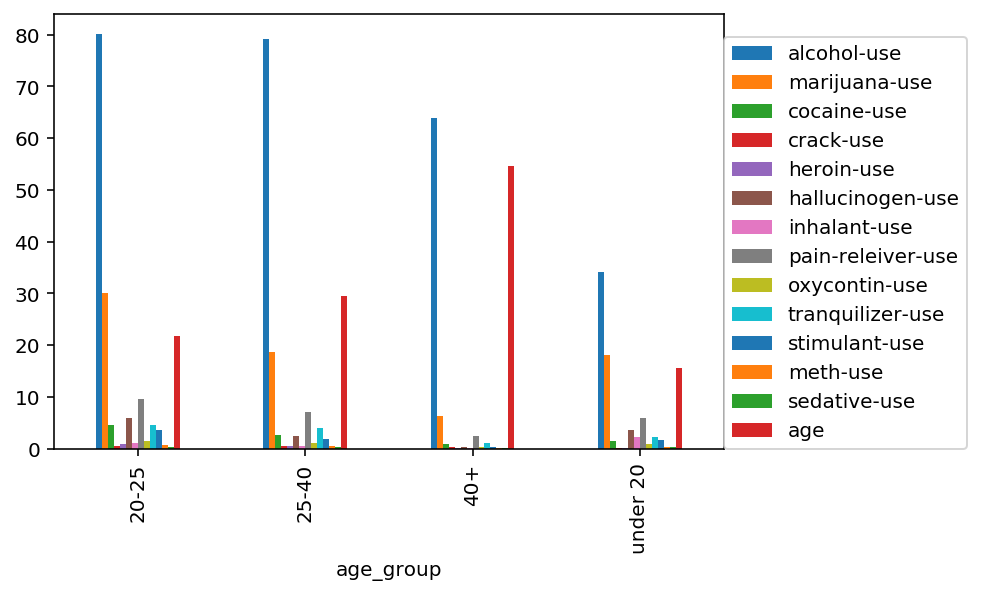

In [62]:
#plots mean values for each drug, for each age category
drug_use_use.groupby('age_group').mean().plot(kind='bar');
plt.legend(loc=[1,0]);

The hypothesis was: younger people are more likely to use drugs than older. Across all drugs, the 20-25 age range consistently produced the highest mean usage. The only exception where the youngest age category was highest was for the inhalent drug. This shows that when compared to older age categories, the youngest's average usage is lower. This contradicts my hypothesis showing that younger people are not as likely to use drugs than older.

Hypothesis 3: There is a low correlation between drug usage and drug frequency.

Basing this hypothesis on the two different heatmaps observed earlier, I will first compare all of drug usage against drug frequency, then consider it between each individual drug. A negative correlation value of greater than -0.7 will lead me to validate my hypothesis.

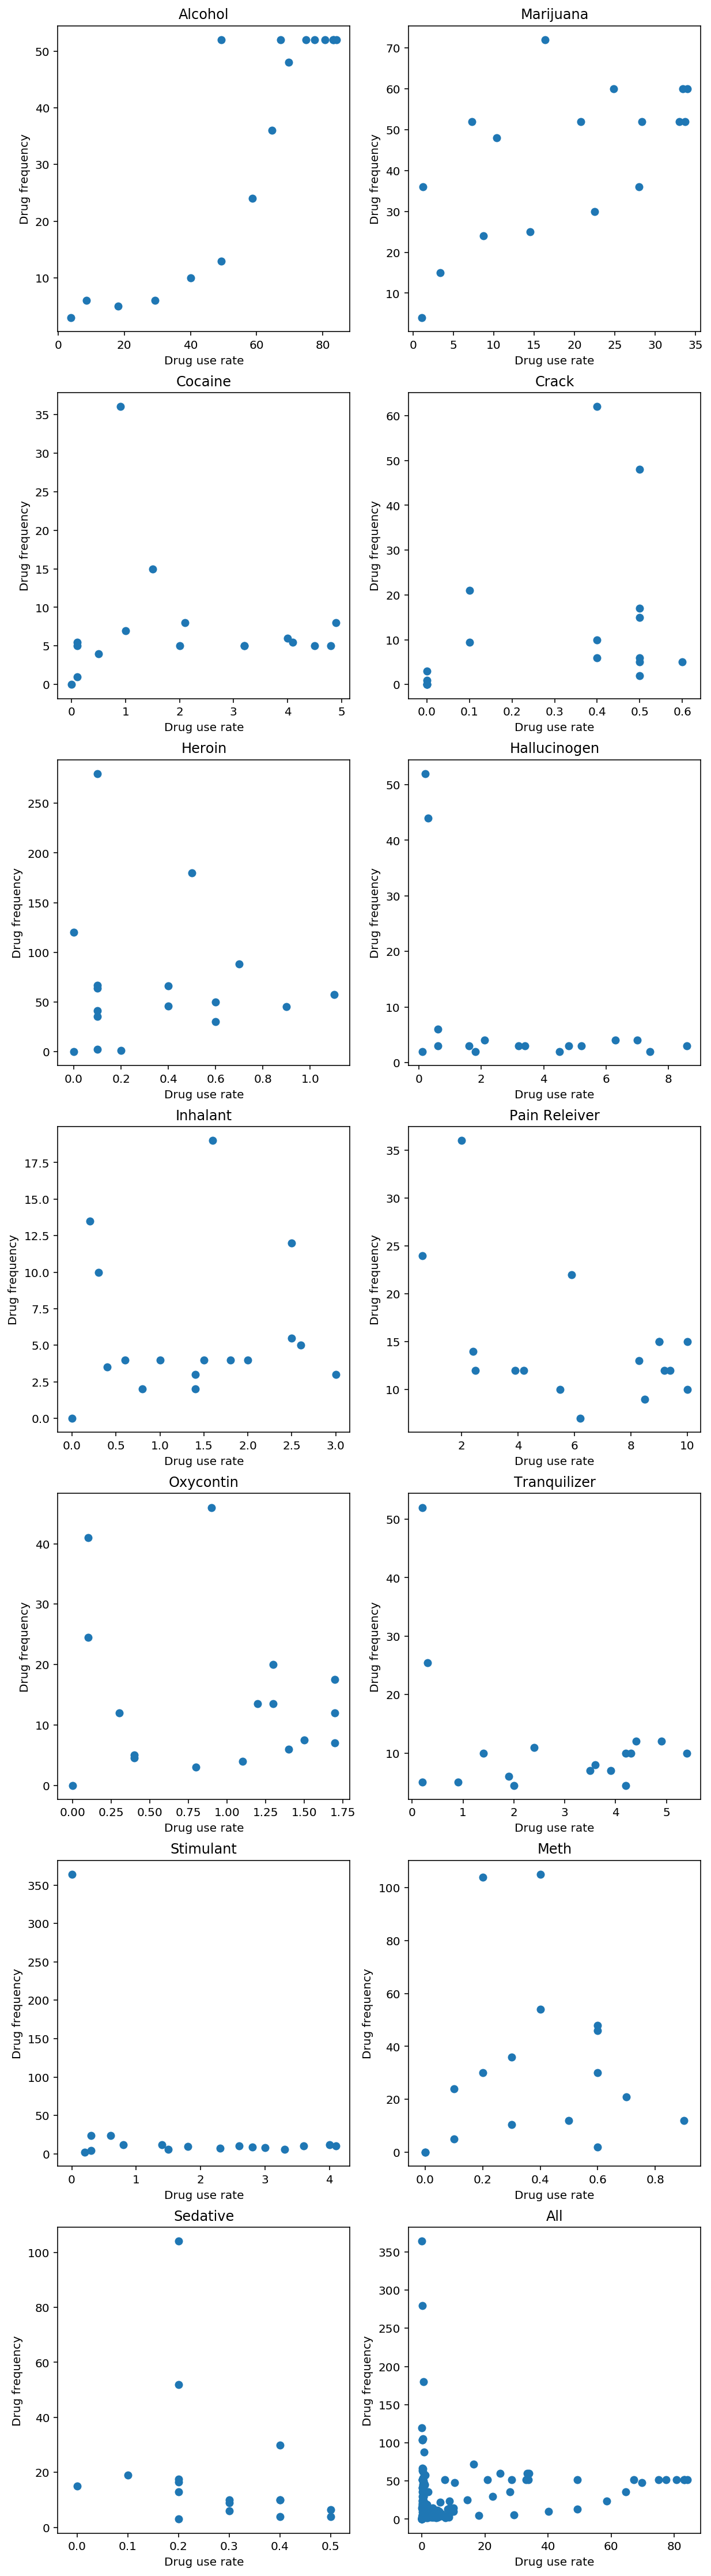

In [151]:
#plots scatter diagrams
fig, ax = plt.subplots(ncols=2,nrows=7, figsize=(10, 40))
ax[0,0].scatter(drug_use_use['alcohol-use'],drug_use_freq['alcohol-frequency'])
ax[0,0].set_title('Alcohol')
ax[0,1].scatter(drug_use_use['marijuana-use'],drug_use_freq['marijuana-frequency']
            )
ax[0,1].set_title('Marijuana')
ax[1,0].scatter(drug_use_use['cocaine-use'],drug_use_freq['cocaine-frequency'])
ax[1,0].set_title('Cocaine')
ax[1,1].scatter(drug_use_use['crack-use'],drug_use_freq['crack-frequency'])
ax[1,1].set_title('Crack')
ax[2,0].scatter(drug_use_use['heroin-use'],drug_use_freq['heroin-frequency'])
ax[2,0].set_title('Heroin')
ax[2,1].scatter(drug_use_use['hallucinogen-use'],drug_use_freq['hallucinogen-frequency'])
ax[2,1].set_title('Hallucinogen')
ax[3,0].scatter(drug_use_use['inhalant-use'],drug_use_freq['inhalant-frequency'])
ax[3,0].set_title('Inhalant')
ax[3,1].scatter(drug_use_use['pain-releiver-use'],drug_use_freq['pain-releiver-frequency'])
ax[3,1].set_title('Pain Releiver')
ax[4,0].scatter(drug_use_use['oxycontin-use'],drug_use_freq['oxycontin-frequency'])
ax[4,0].set_title('Oxycontin')
ax[4,1].scatter(drug_use_use['tranquilizer-use'],drug_use_freq['tranquilizer-frequency'])
ax[4,1].set_title('Tranquilizer')
ax[5,0].scatter(drug_use_use['stimulant-use'],drug_use_freq['stimulant-frequency'])
ax[5,0].set_title('Stimulant')
ax[5,1].scatter(drug_use_use['meth-use'],drug_use_freq['meth-frequency'])
ax[5,1].set_title('Meth')
ax[6,0].scatter(drug_use_use['sedative-use'],drug_use_freq['sedative-frequency'])
ax[6,0].set_title('Sedative');
ax[6,1].scatter(drug_use_use.iloc[:,0:13],drug_use_freq.iloc[:,0:13])
ax[6,1].set_title('All')
for i in range(0,7):
    for j in range(0,2):
        ax[i,j].set_xlabel('Drug use rate')
        ax[i,j].set_ylabel('Drug frequency');

In [144]:
#Calculates correlations
correlations={drug:drug_use.corr()[drug+'-use'][drug+'-frequency'] for drug in drugs}
correlations    

{'alcohol': 0.8978892938239401,
 'marijuana': 0.6156102019478248,
 'cocaine': -0.07784815495891297,
 'crack': 0.3334402854421076,
 'heroin': -0.04423949325806981,
 'hallucinogen': -0.42786265287156117,
 'inhalant': 0.036979407825951945,
 'pain-releiver': -0.46861747477663,
 'oxycontin': -0.14387708969816887,
 'tranquilizer': -0.38895384779316783,
 'stimulant': -0.36335761781352566,
 'meth': 0.05960454457438657,
 'sedative': -0.2842341092152952}

To restate the hypothesis: there is a negative correlation between drug use and drug frequency. Overall, by considering the scatter diagram: it can be argued that there is a negative correlation but it would not be strong enough to validate the hypothesis. 

For individual drugs, negative correlations can be observed within most with pain-relievers and hallucinogens having the strongest correlations. Contradicting my hypothesis, both alcohol and marijuana show large positive correlations between drug use and drug frequency. This suggests, for these particular drugs, that the more likely someone is to use that drug, the more of it they take.

Hypothesis 4: Drugs beginning with the same name have a high correlation of usage.

To test this, I will compare correlations of drugs that start with the same letter. For my hypothesis to be correct, these comparisons should yield high positive correlations close to 1.

Drugs to compare: crack and cocaine, heroin and hallucinogen, stimulant and sedative.

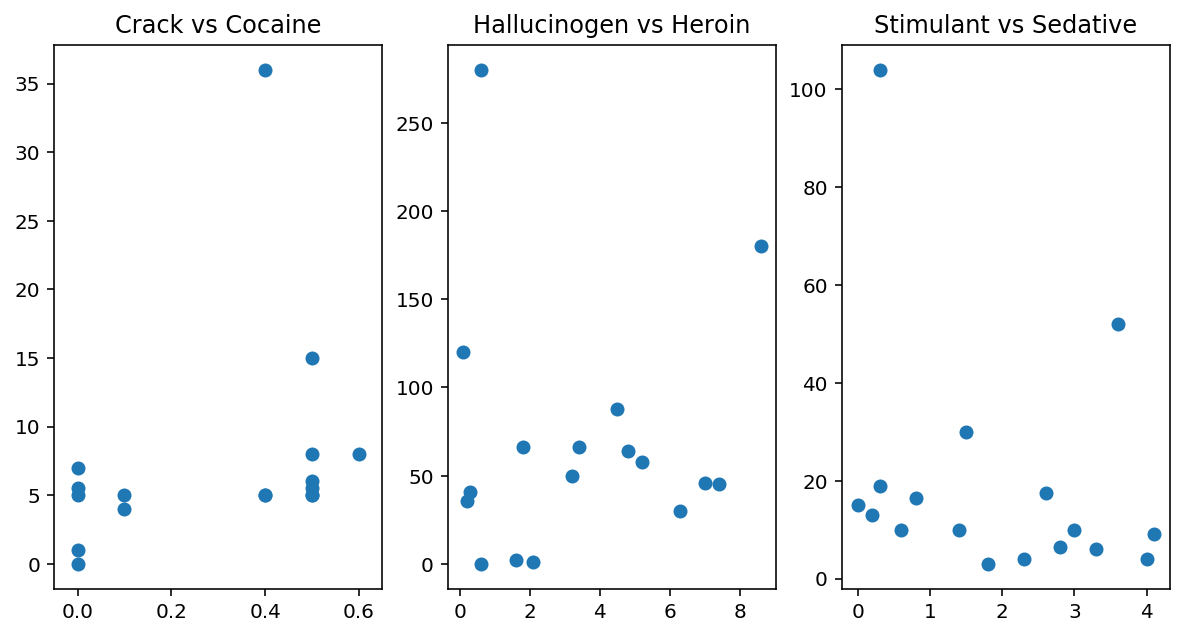

In [161]:
#Plots scatter diagrams
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].scatter(drug_use_use['crack-use'],drug_use_freq['cocaine-frequency'])
ax[0].set_title('Crack vs Cocaine')
ax[1].scatter(drug_use_use['hallucinogen-use'],drug_use_freq['heroin-frequency'])
ax[1].set_title('Hallucinogen vs Heroin')
ax[2].scatter(drug_use_use['stimulant-use'],drug_use_freq['sedative-frequency'])
ax[2].set_title('Stimulant vs Sedative');

In [162]:
#Calculate correlations for each comparison
correlations_same={'C':drug_use.corr()['crack-use']['cocaine-use'],
                   'H':drug_use.corr()['hallucinogen-use']['cocaine-use'],
                   'S':drug_use.corr()['stimulant-use']['sedative-use']}
correlations_same   

{'C': 0.8357267652905687, 'H': 0.8556684140641596, 'S': 0.567956129001147}

My hypothesis was that drugs starting with the same letter would have strong positive correlation. By considering the scatter diagrams and correlations it can be seen that all three possible pairings do have positive correlations. Drugs beginning with 'C' and 'H' were observed to have strong positive correlations, supporting my hypothesis, whereas, drugs beginning with 'S' still had a positive correlation but not as strong, somewhat supporting my hypothesis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [65]:
iqr={}
for column in sat_stand.columns:
    inputs=sat_scores[column]
    flier_upper=np.percentile(inputs,75) + 1.5 * (np.percentile(inputs,75)-np.percentile(inputs,25))
    flier_lower=np.percentile(inputs,25) - 1.5 * (np.percentile(inputs,75)-np.percentile(inputs,25))
    iqr[column]=[flier_lower,flier_upper]
iqr

{'rate': [-73.5, 146.5], 'verbal': [409.5, 653.5], 'math': [421.25, 639.25]}

In [66]:
std_3={}
for column in sat_stand.columns:
    inputs=sat_scores[column]
    flier_std_upper=np.mean(inputs)+3*np.std(inputs)
    flier_std_lower=np.mean(inputs)-3*np.std(inputs)
    std_3[column]=[flier_std_lower,flier_std_upper]
std_3    
    


{'rate': [-44.83771602816077, 118.83771602816077],
 'verbal': [433.433463712249, 631.6253598171627],
 'math': [424.05351773555975, 639.6327567742442]}

In [67]:
std_2={}
for column in sat_stand.columns:
    inputs=sat_scores[column]
    flier_std_upper=np.mean(inputs)+2*np.std(inputs)
    flier_std_lower=np.mean(inputs)-2*np.std(inputs)
    std_2[column]=[flier_std_lower,flier_std_upper]
std_2    
    

{'rate': [-17.558477352107182, 91.55847735210719],
 'verbal': [466.46544639640126, 598.5933771330104],
 'math': [459.9833909086738, 603.7028836011301]}

In [68]:
#Checking Z scores
print(sat_stand.max())
print(sat_stand.min())

rate      1.633353
verbal    1.812631
math      1.960925
dtype: float64
rate     -1.197793
verbal   -1.514640
math     -2.558551
dtype: float64


In [69]:
sat_scores.describe()

,rate,verbal,math,verbal_math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


The only metric that returned an outlier is math scores on 2 standard deviations below the mean. I believe this is an appropriate metric as ith normally distributed data 95% of the data would fall within 2 standard deviations of the mean (by the central limit theorem we can assume normality as there are greater than 30 samples).

In [70]:
sat_scores.math[sat_scores['math']<460]
#There is one piece of data that can be considered an outlier

27    439
Name: math, dtype: int64

In [71]:
#Removing it from dataset
sat_scores_clean=sat_scores[sat_scores['math']>460]
print(sat_scores.math.describe())
print(sat_scores_clean.math.describe())

count     51.000000
mean     531.843137
std       36.287393
min      439.000000
25%      503.000000
50%      525.000000
75%      557.500000
max      603.000000
Name: math, dtype: float64
count     50.000000
mean     533.700000
std       34.120584
min      474.000000
25%      505.250000
50%      525.500000
75%      559.250000
max      603.000000
Name: math, dtype: float64


Removing the outlier, the mean improves by 2 points, the standard deviation decreases by 2 points awhile the median remains the same. This is to be expected as removing the lowest value will result in the mean, and by having less data further from the mean should lead to a reduction in standard deviation.

However, the change in values is small showing the removal of the outlier is not having a meaningful effect. Again, this is expected as I had to broaden my range of the definition of an outlier.

I am surprised with these results however, as the scatter diagrams involving math clearly show an outlier. But because of the large interquartile range in this variable, the outlier is hidden and as such not influential.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [72]:
srcc_verbal_math=stats.spearmanr(sat_scores.verbal,sat_scores.math)
srcc_verbal_math

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

Spearman's rank returns a correlation coefficient of 0.905 with a p value <1%, showing that there is a strong positive correlation between verbal scores and math scores.

Pearson correlation coefficient was 0.899871, compared to 0.905205 which to 1 significant figure are the same. Both show a strong positive correlation between the variables, indicating that students with high verbal scores are more likely to produce high math scores also.

Spearman's Rank Correlation Coefficient is calculated by this process:

1) For each variable: rank the elements in order (can be ascending or descending but must be consistent between both variables)
2) For each datapoint find the difference in ranks between the two variables
3) Next, sum the squared differences and multiply by 6
4) Divide the sum by the product of n and (n^2-1) where n is the number of data points
5) Finally, subtract this value from 1 to obtain the SRCC
4) The values will be between -1 and 1 with negative values showing negative correlation and likewise for positive
5) The closer the value is to 1/-1 shows the strength of the correlation. 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [172]:
stats.percentileofscore(sat_scores['rate'],80)

96.07843137254902

In [190]:
percent=[]
for i in sat_scores.rate:
     blah.append(round(stats.percentileofscore(sat_scores['rate'],i),2))
sat_scores['rate_percentile']=percent
sat_scores

,state,rate,verbal,math,verbal_math,rate_percentile
0,CT,82,509,510,-1,100.00
1,NJ,81,499,513,-14,98.04
2,MA,79,511,515,-4,96.08
3,NY,77,495,505,-10,94.12
4,NH,72,520,516,4,92.16
5,RI,71,501,499,2,89.22
6,PA,71,500,499,1,89.22
7,VT,69,511,506,5,85.29
8,ME,69,506,500,6,85.29
9,VA,68,510,501,9,82.35


In [195]:
sat_scores[sat_scores['state']=='CT']['rate_percentile']

0    100.0
Name: rate_percentile, dtype: float64

Spearman's rank gives each value in a column a rank based on how large they are compared to the rest of the column

Percentile scoring shows for each value, the percent of values in that column that are smaller. In effect, it is also ranking each value in a column by showing how big it is in comparison to the rest of the column.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

When looking through a column of percentile scores, if there is a significantly large gap between two consecutive values it could suggest that the larger (or smaller if that the lower end) values are outliers.

In [230]:
heroin=drug_use['heroin-frequency']

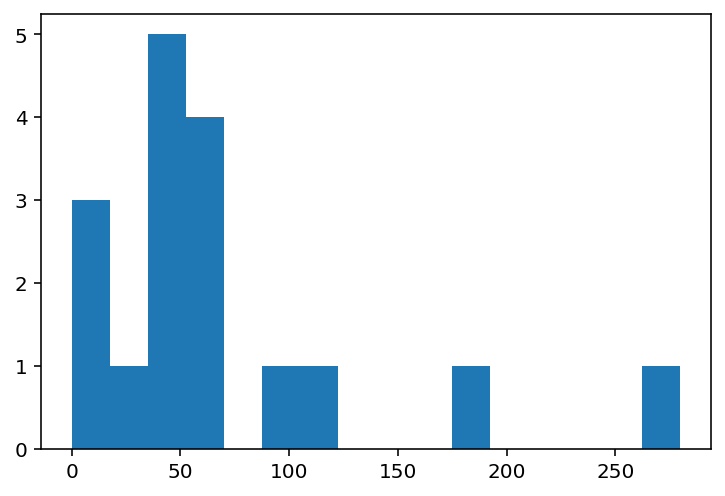

In [231]:
plt.hist(heroin,bins=16);

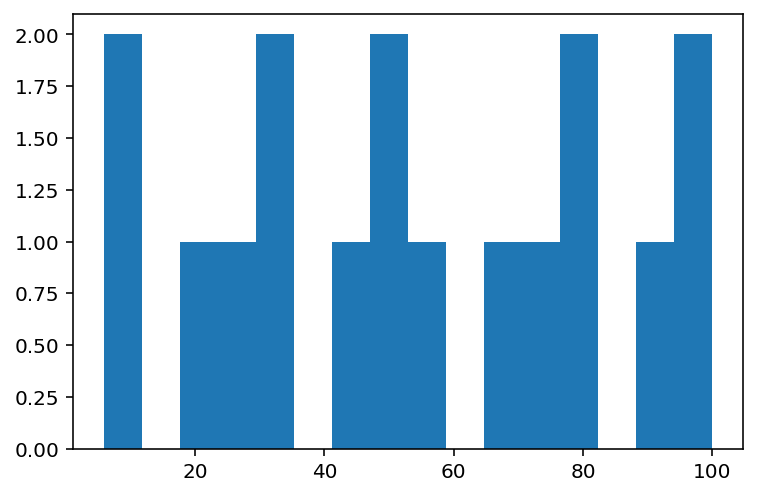

In [243]:
#Turns heroin-frequency into percentile scoring
heroin_perc=[]
for i in drug_use['heroin-frequency']:
     heroin_perc.append(round(stats.percentileofscore(drug_use['heroin-frequency'],i),2))
drug_use['heroin_freq_percentile']=heroin_perc
plt.hist(drug_use['heroin_freq_percentile'],bins=16);

In [241]:
drug_use[['heroin-frequency','heroin_freq_percentile']]

,heroin-frequency,heroin_freq_percentile
0,35.5,29.41
1,0.0,5.88
2,2.0,17.65
3,1.0,11.76
4,66.5,76.47
5,64.0,64.71
6,46.0,47.06
7,180.0,94.12
8,45.0,41.18
9,30.0,23.53


Converting raw scores to percentiles collects the histogram into their percentile scores as opposed to their actual values. Visually, this creates a different distribution as values are collected on their relative percentages, not relative raw values. For example, two values which are relatively far apart by raw value could be grouped together by percentile scoring due to their positions when ranked from smallest to largest, as can be seen with rows 7 and 14 above.

In terms of outliers, a significant gap will be observable in the chart where the outliers lie. Checking the boxplot for heroin-frequency it is noticeable that there are two outliers at the bottom end. This is reflected within the histogram of percentile scores as there is a gap between the lowest percentiles and the next showing the presence of outliers. 

